#DAV 6150 Project 1: *Regression Models*

#### Team members
- Vinicius Giannaccini
- Manvitha Karanam

# **Introduction**

- In this project, we analyze New York State high school graduation data from the 2018-2019 school year to identify factors that influence student dropout rates.

Our objective is to build regression models to predict the number of students who drop out (dropout_cnt) based on school district characteristics and student subgroup attributes. We will apply Poisson regression, Negative Binomial regression, and Multiple Linear regression to explore relationships between explanatory variables and dropout rates.

To achieve our goal, we will follow these steps:

- **Exploratory Data Analysis (EDA)**: Understand the dataset, identify missing values, and visualize key trends.
- **Data Preparation**: Clean the dataset, handle missing values, and engineer features as needed.
- **Feature Selection:** Use statistical and machine learning techniques to determine the most relevant predictors.
 **Regression Modeling:** Build and compare different regression models (Poisson, Negative Binomial, and Multiple Linear Regression).
- **Model Selection & Evaluation:** Choose the best-performing model based on interpretability and accuracy.
- **Conclusion & Insights:** Summarize findings and discuss implications for policy and intervention.

### **Data Summary**

  This dataset contains information on **high school graduation metrics** for the **2018-2019 school year** in New York State. It was sourced from the **New York State Education Department (NYSED)** ([Data Link](https://data.nysed.gov/downloads.php)) and consists of **over 73,000 observations**, each representing a specific **school district** and **student subgroup**.  

- Each observation represents a **student subgroup** within a **school district** that has been enrolled for at least **four years**.  
- The dataset includes **demographic and academic performance attributes**, such as **graduation rates, diploma types, and dropout rates**.  
- A student can belong to **multiple subgroupings** (e.g., gender, ethnicity, English proficiency).  



### **Main Attributes in the Dataset**  

| **Attribute** | **Description** |
|--------------|----------------|
| `report_school_year` | The academic year for which the graduation data is reported. |
| `aggregation_index` | Numeric code indicating how the data has been aggregated. |
| `aggregation_type` | Text description of how the data is aggregated (e.g., by school, district). |
| `nrc_code`, `nrc_desc` | Numeric code and text description of the **Needs/Resource Capacity** indicator for a school district. |
| `county_code`, `county_name` | Numeric code and full name of the county in NY State. |
| `nyc_ind` | Indicates whether the school district is in **New York City** (Yes/No). |
| `membership_desc` | The year students first enrolled in high school. |
| `subgroup_code`, `subgroup_name` | Numeric code and text description of a **student subgroup** (e.g., "Female", "Hispanic", "English Language Learner"). |
| `enroll_cnt` | The number of students enrolled in a specific subgroup. |
| `grad_cnt`, `grad_pct` | The count and percentage of students who graduated. |
| `local_cnt`, `local_pct` | The count and percentage of students awarded a **Local Diploma**. |
| `reg_cnt`, `reg_pct` | The count and percentage of students awarded a **Regents Diploma**. |
| `reg_adv_cnt`, `reg_adv_pct` | The count and percentage of students awarded a **Regents Advanced Diploma**. |
| `non_diploma_credential_cnt`, `non_diploma_credential_pct` | The count and percentage of students earning a **non-diploma credential**. |
| `still_enrolled_cnt`, `still_enrolled_pct` | The count and percentage of students still enrolled but not graduated. |
| `ged_cnt`, `ged_pct` | The count and percentage of students who earned a **GED diploma**. |
| `dropout_cnt`, `dropout_pct` | The count and percentage of students who **dropped out** of school. |

The **primary variable of interest** in this project is **`dropout_cnt`**, which represents the **number of students who discontinued enrollment** in a given school district and student subgroup.  

Our goal is to analyze various features of the dataset and construct **regression models** to predict **dropout counts** based on different school and student characteristics.

# **Exploratory Data Analysis**

In [64]:
# Importing basic Libraries.

import pandas as pd
import numpy as np

In [65]:
url = 'https://raw.githubusercontent.com/manvithakakollu/dav_6150_datascience/manvitha/Project1_Data.csv'
df = pd.read_csv(url)

# Display first few rows
df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%


In [66]:
df

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73148,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73149,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73150,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  73152 non-null  object
 13  grad_cnt                    73152 non-null  ob

- General Information Columns: report_school_year (object) – The academic year for the reported data. aggregation_index (int64) – A numeric identifier used for aggregation. aggregation_type (object) – The type of aggregation applied (e.g., district, county, state). aggregation_name (object) – The specific name associated with the aggregation (e.g., a county or district name). Geographical & Classification Columns: nrc_code (int64) – A numeric code that categorizes schools or districts under an NRC classification. nrc_desc (object) – The description of the NRC classification. county_code (int64) – A numeric code identifying the county. county_name (object) – The name of the county. nyc_ind (int64) – Indicator for whether the school/district is in New York City (1 = NYC, 0 = Other). membership_desc (object) – A description of the student group or membership. subgroup_code (int64) – A numeric code representing a specific subgroup (e.g., ethnicity, special education). subgroup_name (object) – The name of the subgroup (e.g., Hispanic, Students with Disabilities). Student Outcome Metrics: These columns measure student performance and academic outcomes.

- Enrollment & Graduation Data: enroll_cnt (object) – Number of students enrolled. grad_cnt (object) – Number of students who graduated. grad_pct (object) – Percentage of enrolled students who graduated. Local & Regents Diplomas: local_cnt (object) – Number of students who earned a local diploma. local_pct (object) – Percentage of students who earned a local diploma. reg_cnt (object) – Number of students who earned a standard Regents diploma. reg_pct (object) – Percentage of students who earned a standard Regents diploma. reg_adv_cnt (object) – Number of students who earned an Advanced Regents diploma. reg_adv_pct (object) – Percentage of students who earned an Advanced Regents diploma. Non-Diploma Credentials & Continuing Enrollment: non_diploma_credential_cnt (object) – Number of students who earned a non-diploma credential (e.g., certificates). non_diploma_credential_pct (object) – Percentage of students who earned a non-diploma credential. still_enr_cnt (object) – Number of students still enrolled (not graduated or dropped out). still_enr_pct (object) – Percentage of students still enrolled. GED & Dropout Data: ged_cnt (object) – Number of students who earned a GED. ged_pct (object) – Percentage of students who earned a GED. dropout_cnt (object) – Number of students who dropped out. dropout_pct (object) – Percentage of students who dropped out.

In [68]:
df.shape

(73152, 29)

In [69]:
import pandas as pd

# Assuming df is your DataFrame
columns = df.columns.tolist()

# Print column names
print(columns)

['report_school_year', 'aggregation_index', 'aggregation_type', 'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code', 'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code', 'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt', 'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct', 'non_diploma_credential_cnt', 'non_diploma_credential_pct', 'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt', 'dropout_pct']


In [70]:
df.isnull().sum()<0

,0
report_school_year,False
aggregation_index,False
aggregation_type,False
aggregation_name,False
nrc_code,False
nrc_desc,False
county_code,False
county_name,False
nyc_ind,False
membership_desc,False


In [71]:
# checking for duplicate values.

df.duplicated().sum()

0

In [72]:
import pandas as pd

# Select only columns that have missing values
missing_cols = df.columns[df.isnull().sum() > 0].tolist()

# Print columns with missing values
print(missing_cols)


[]


In [73]:
# List of count columns (these should be converted to int)
count_columns = [
    'aggregation_index', 'nrc_code', 'county_code', 'subgroup_code', 'enroll_cnt',
    'grad_cnt', 'local_cnt', 'reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt',
    'still_enr_cnt', 'ged_cnt', 'dropout_cnt'
]

# List of percentage columns (these should be converted to floats)
percentage_columns = [
    'grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct',
    'still_enr_pct', 'ged_pct', 'dropout_pct'
]


# Convert count columns to integers (ignoring NaNs)
df[count_columns] = df[count_columns].apply(pd.to_numeric, errors='coerce').fillna(value=pd.NA).astype('Int64')

# Remove '%' from percentage columns
df[percentage_columns] = df[percentage_columns].apply(lambda x: x.str.rstrip('%'))

# Convert percentage columns to floats (ignoring NaNs)
df[percentage_columns] = df[percentage_columns].apply(pd.to_numeric, errors='coerce').fillna(value=pd.NA).astype(float)

Categorical Variables (Qualitative Information) These variables provide descriptive information and represent labels or categories.

report_school_year (object) Qualitative: Academic year (e.g., "2020-2021").

aggregation_type (object) Qualitative: Type of aggregation (e.g., district, county, state).

aggregation_name (object) Qualitative: Name associated with the aggregation (e.g., a district or county name).

nrc_desc (object) Qualitative: Description of the NRC classification.

county_name (object) Qualitative: Name of the county.

membership_desc (object) Qualitative: Description of the student group or membership.

subgroup_name (object) Qualitative: Name of the subgroup (e.g., Hispanic, Students with Disabilities).

Columns Represented as Numeric Codes (Categorical-like Identifiers) Even though these are stored as numbers, they serve as identifiers or codes rather than continuous measurements.

aggregation_index (int64) Quantitative Identifier: Numeric ID used for aggregation.

nrc_code (int64) Quantitative Identifier: Numeric code categorizing schools/districts under an NRC classification.

county_code (int64) Quantitative Identifier: Numeric code identifying the county.

nyc_ind (int64) Categorical (Binary): Indicates if the school/district is in NYC (1 = NYC, 0 = Other).

subgroup_code (int64) Quantitative Identifier: Numeric code representing a specific subgroup.

In [74]:
# selecting the needed columns to change
columns_to_convert = ['aggregation_index', 'nrc_code', 'county_code', 'nyc_ind', 'subgroup_code']

#Fixing the data type
df[columns_to_convert] = df[columns_to_convert].astype(object)

# Display the data types to verify the conversion
df.dtypes

,0
report_school_year,object
aggregation_index,object
aggregation_type,object
aggregation_name,object
nrc_code,object
nrc_desc,object
county_code,object
county_name,object
nyc_ind,object
membership_desc,object


In [75]:
! pip install squarify
! pip install plotly

In [76]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import squarify
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

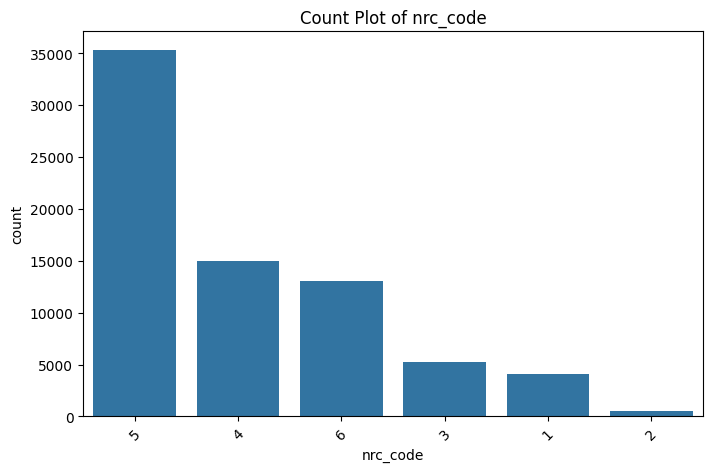

In [77]:
plt.figure(figsize=(8, 5))
sns.countplot(x='nrc_code', data=df, order=df['nrc_code'].value_counts().index)
plt.title('Count Plot of nrc_code')
plt.xticks(rotation=45)
plt.show()


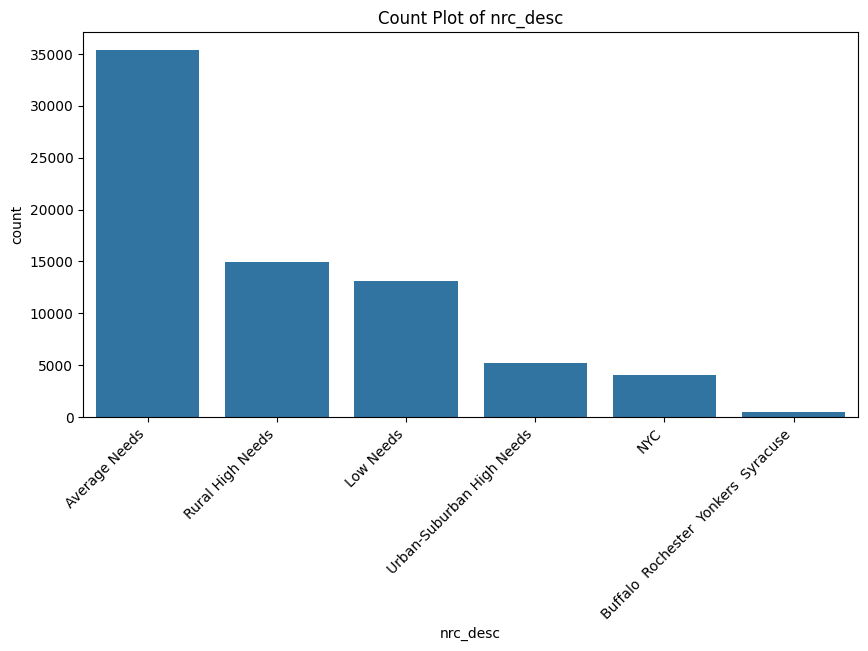

In [78]:
plt.figure(figsize=(10, 5))
sns.countplot(x='nrc_desc', data=df, order=df['nrc_desc'].value_counts().index)
plt.title('Count Plot of nrc_desc')
plt.xticks(rotation=45, ha='right')
plt.show()

In [79]:
# Count the occurrences of each county name
county_data = df['county_name'].value_counts().reset_index()
county_data.columns = ['county_name', 'count']

# Create an interactive treemap
fig = px.treemap(county_data,
                 path=['county_name'],
                 values='count',
                 color='count',
                 color_continuous_scale='Blues',
                 title="County Name Distribution")

# Show the plot
fig.show()


More number of schools from "Suffolk" county are present in the dataset

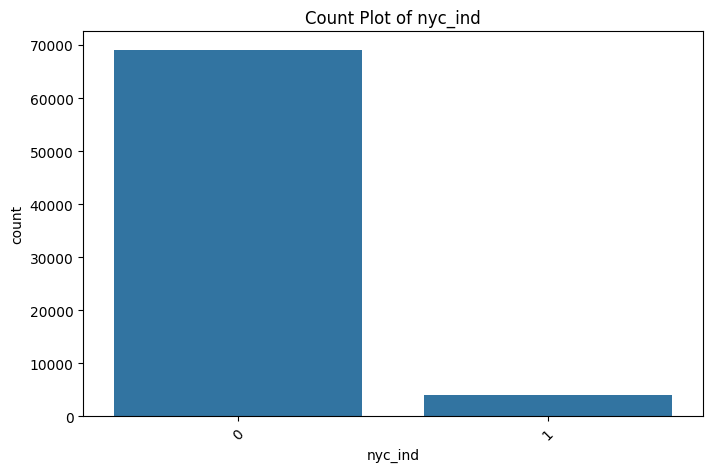

In [80]:
plt.figure(figsize=(8, 5))
sns.countplot(x='nyc_ind', data=df, order=df['nyc_ind'].value_counts().index)
plt.title('Count Plot of nyc_ind')
plt.xticks(rotation=45)
plt.show()

- More number of schools from "Suffolk" county are present in the dataset

In [81]:
df['membership_desc'].value_counts()

,count
membership_desc,
2015 Total Cohort - 4 Year Outcome,12299
2015 Total Cohort - 4 Year Outcome - August 2019,12299
2014 Total Cohort - 5 Year Outcome,12257
2014 Total Cohort - 5 Year Outcome - August 2019,12257
2013 Total Cohort - 6 Year Outcome,12020
2013 Total Cohort - 6 Year Outcome - August 2019,12020


there are six unique values

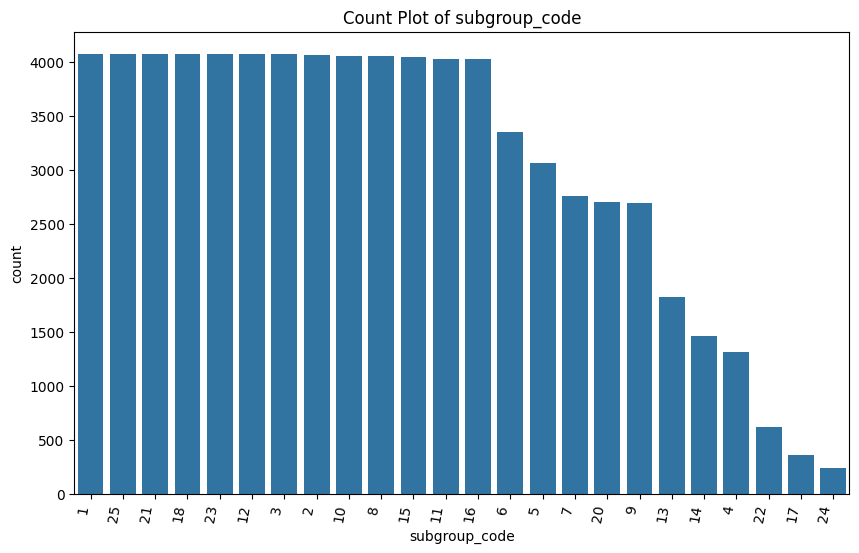

In [82]:
# Count plot for subgroup_name

plt.figure(figsize=(10, 6))
sns.countplot(x='subgroup_code', data=df, order=df['subgroup_code'].value_counts().index)
plt.title('Count Plot of subgroup_code')
plt.xticks(rotation=80, ha= 'right')
plt.show()

sub group code 1, 25,21,18,23,12,3,2,10,8,15,5 have highest count of students , while 24 is the least

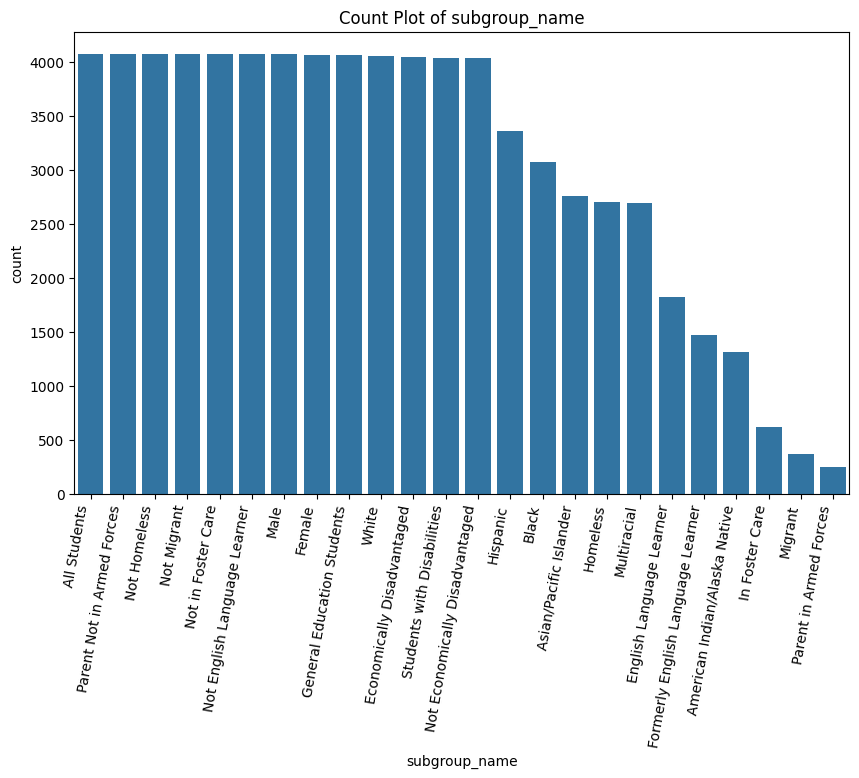

In [83]:
# Count plot for subgroup_name

plt.figure(figsize=(10, 6))
sns.countplot(x='subgroup_name', data=df, order=df['subgroup_name'].value_counts().index)
plt.title('Count Plot of subgroup_name')
plt.xticks(rotation=80, ha= 'right')
plt.show()

Maximum students are from sub-groups of All Students to Not economically disadvantaged.

In [84]:
df['enroll_cnt']

,enroll_cnt
0,658
1,324
2,334
3,<NA>
4,367
...,...
73147,<NA>
73148,<NA>
73149,<NA>
73150,<NA>


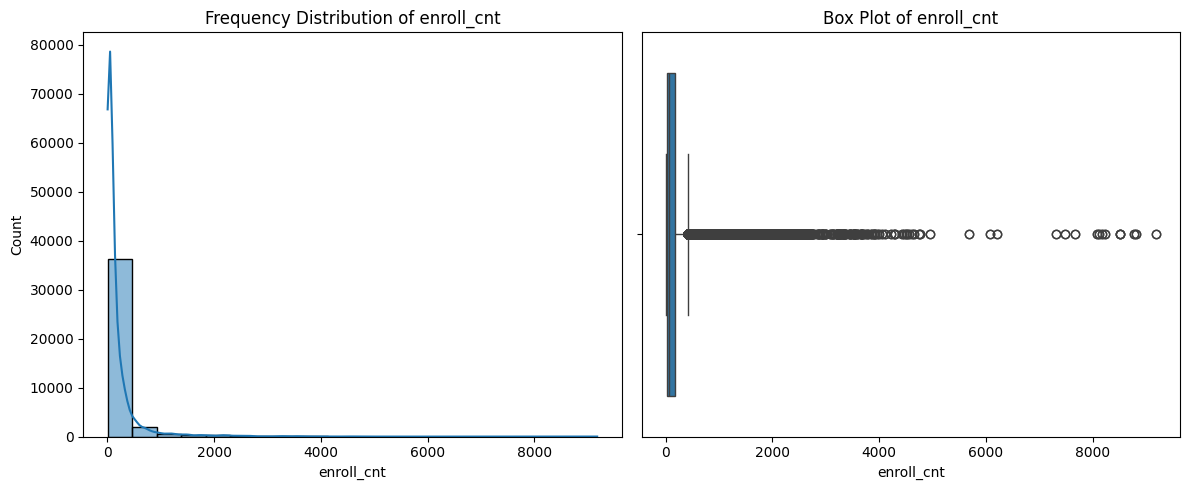

,enroll_cnt
count,39674.0
mean,192.120079
std,439.972474
min,5.0
25%,25.0
50%,66.0
75%,179.0
max,9176.0


In [85]:


# Convert enroll_cnt to numeric
df['enroll_cnt'] = pd.to_numeric(df['enroll_cnt'], errors='coerce')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Frequency (Count) Plot
sns.histplot(df['enroll_cnt'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Frequency Distribution of enroll_cnt")

# Box Plot
sns.boxplot(x=df['enroll_cnt'], ax=axes[1])
axes[1].set_title("Box Plot of enroll_cnt")

plt.tight_layout()
plt.show()
df['enroll_cnt'].describe()

The histogram is right skewed with median as 66 and with many outliers on max side

Summary Statistics of grad_cnt:
count       39674.0
mean     161.178354
std      361.294773
min             0.0
25%            20.0
50%            57.0
75%           156.0
max          7540.0
Name: grad_cnt, dtype: Float64


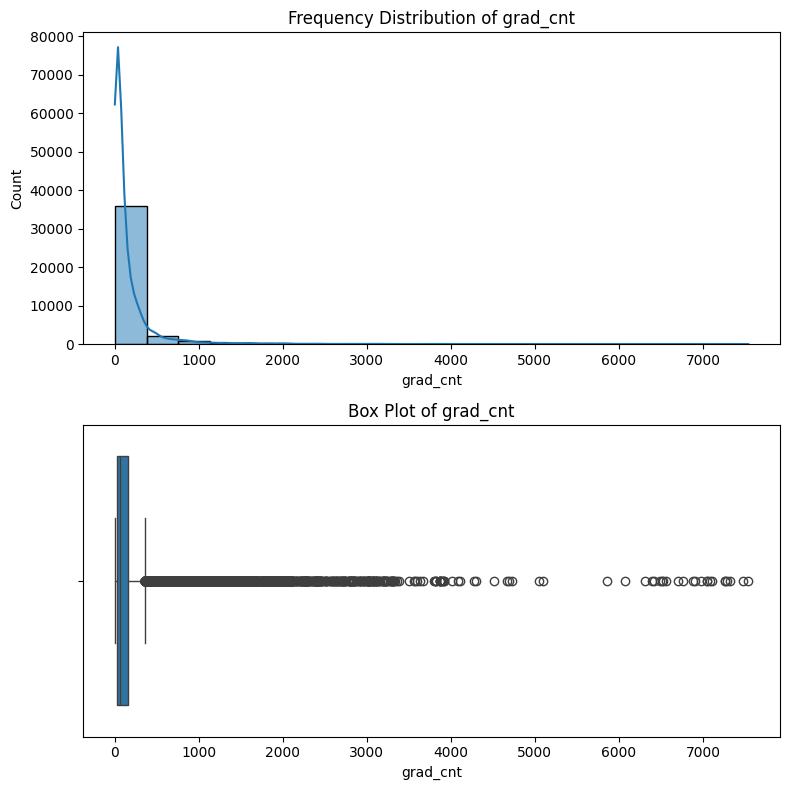

In [86]:
# Convert grad_cnt to numeric
df['grad_cnt'] = pd.to_numeric(df['grad_cnt'], errors='coerce')

# Summary Statistics
print("Summary Statistics of grad_cnt:")
print(df['grad_cnt'].describe())

# Create subplots (1 column layout)
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Frequency (Histogram) Plot
sns.histplot(df['grad_cnt'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Frequency Distribution of grad_cnt")

# Box Plot
sns.boxplot(x=df['grad_cnt'], ax=axes[1])
axes[1].set_title("Box Plot of grad_cnt")

plt.tight_layout()
plt.show()

- The Histogram is right skewed with median

Summary Statistics of grad_pct:
count    39674.000000
mean        84.406614
std         15.679500
min          0.000000
25%         79.000000
50%         89.000000
75%         95.000000
max        100.000000
Name: grad_pct, dtype: float64


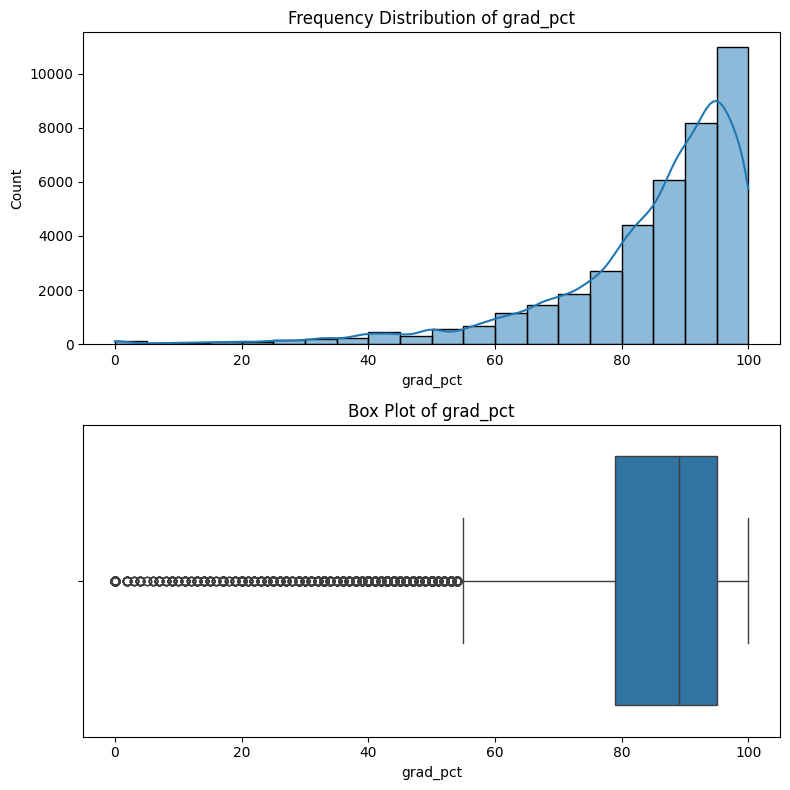

In [87]:
# Convert grad_cnt to numeric
df['grad_pct'] = pd.to_numeric(df['grad_pct'], errors='coerce')

# Summary Statistics
print("Summary Statistics of grad_pct:")
print(df['grad_pct'].describe())

# Create subplots (1 column layout)
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Frequency (Histogram) Plot
sns.histplot(df['grad_pct'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Frequency Distribution of grad_pct")

# Box Plot
sns.boxplot(x=df['grad_pct'], ax=axes[1])
axes[1].set_title("Box Plot of grad_pct")

plt.tight_layout()
plt.show()

 The data is left skewed and has outliers on left side creating a tail.


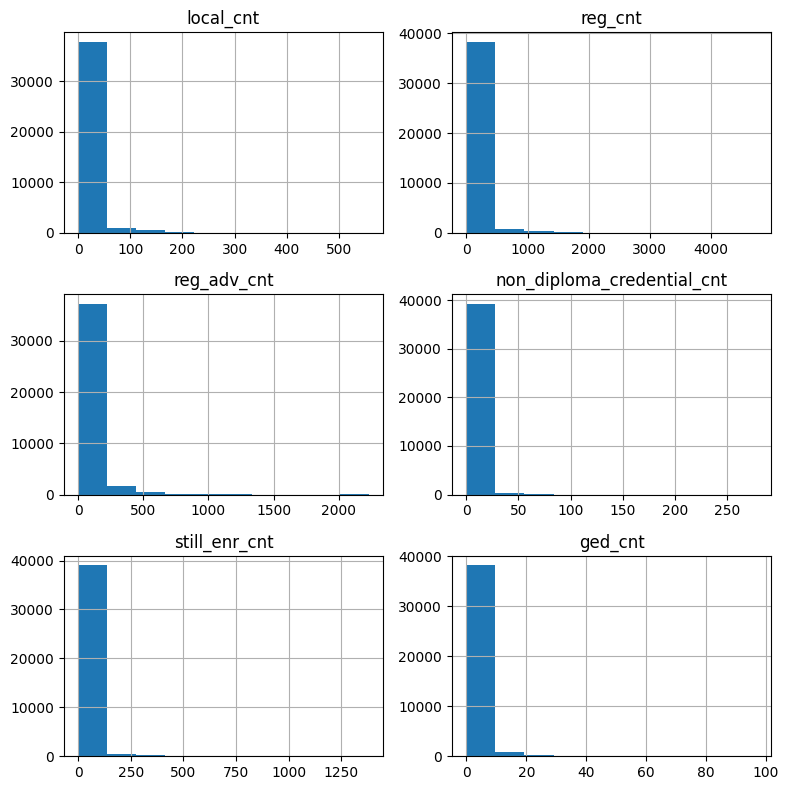

In [88]:
# Diplomas in count
diplomas_count = ['local_cnt',
        'reg_cnt',  'reg_adv_cnt',
       'non_diploma_credential_cnt',
       'still_enr_cnt',  'ged_cnt']

# Diplomas in Percentage
diplomas_percentage = ['local_pct',
        'reg_pct',  'reg_adv_pct',
       'non_diploma_credential_pct',
       'still_enr_pct',  'ged_pct']

# histograms for diplomas_count
df[diplomas_count].hist(figsize=(8,8))
plt.tight_layout()
plt.show()

- We can observe a mostly right skewed data from the histograms

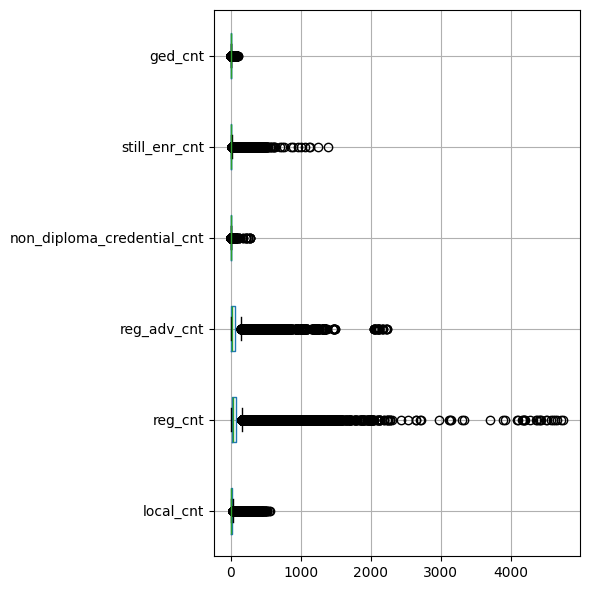

,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt
count,39674.0,39674.0,39674.0,39674.0,39674.0,39674.0
mean,12.340903,86.804708,62.032742,1.924485,11.299516,1.377577
std,32.046302,225.795826,132.777866,6.498913,40.766672,4.949389
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,10.0,4.0,0.0,0.0,0.0
50%,4.0,27.0,18.0,0.0,2.0,0.0
75%,10.0,69.0,62.0,2.0,5.0,1.0
max,557.0,4752.0,2231.0,279.0,1381.0,97.0


In [89]:
# Box plot for diplomas_count
df[diplomas_count].boxplot(figsize=(6,6), vert= False)
plt.tight_layout()
plt.show()
df[diplomas_count].describe()

There are potential outliers towards right side.

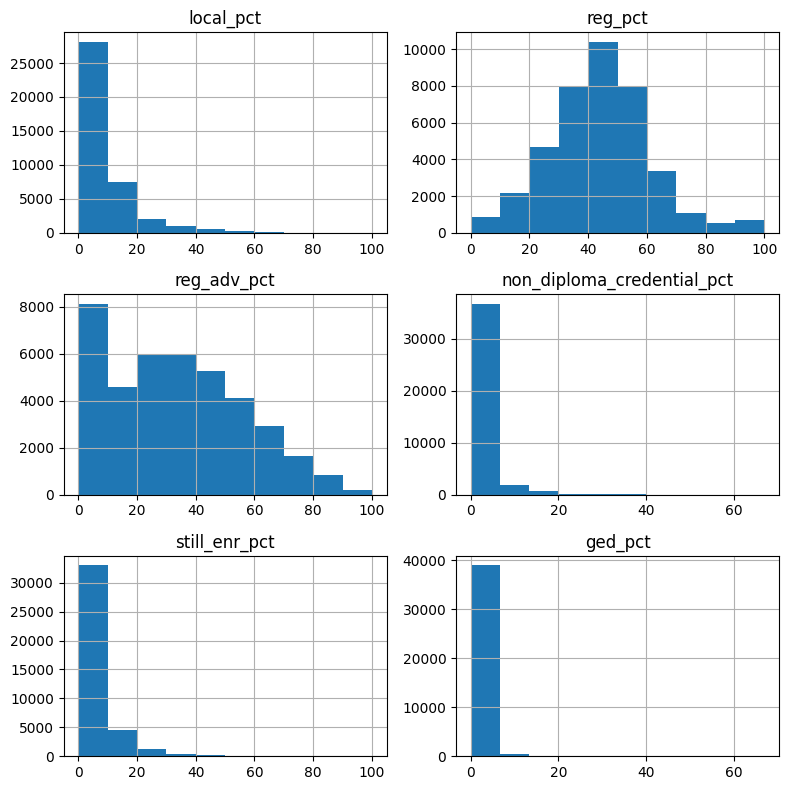

In [90]:
# histograms for diplomas_percentage
df[diplomas_percentage].hist(figsize=(8,8))
plt.tight_layout()
plt.show()

 There are mostly right skewed data and reg-pct shows normal distribution

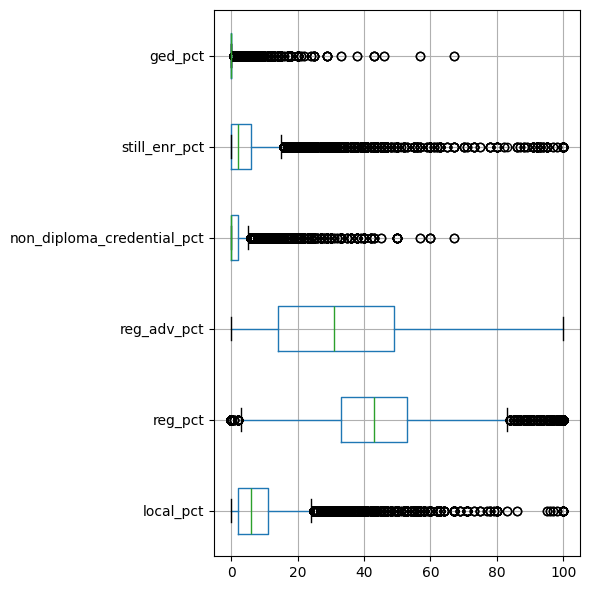

,local_pct,reg_pct,reg_adv_pct,non_diploma_credential_pct,still_enr_pct,ged_pct
count,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000
mean,8.479936,43.371125,32.577204,1.742627,5.190704,0.612693
std,10.398486,17.124891,23.001197,4.063987,8.832710,1.985445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,33.000000,14.000000,0.000000,0.000000,0.000000
50%,6.000000,43.000000,31.000000,0.000000,2.000000,0.000000
75%,11.000000,53.000000,49.000000,2.000000,6.000000,0.000000
max,100.000000,100.000000,100.000000,67.000000,100.000000,67.000000


In [91]:
# Box plot for diplomas_percentage
df[diplomas_percentage].boxplot(figsize=(6,6), vert= False)
plt.tight_layout()
plt.show()
df[diplomas_percentage].describe()

- from this plots we can say that there are potential outliers in variables except reg_adv_pct

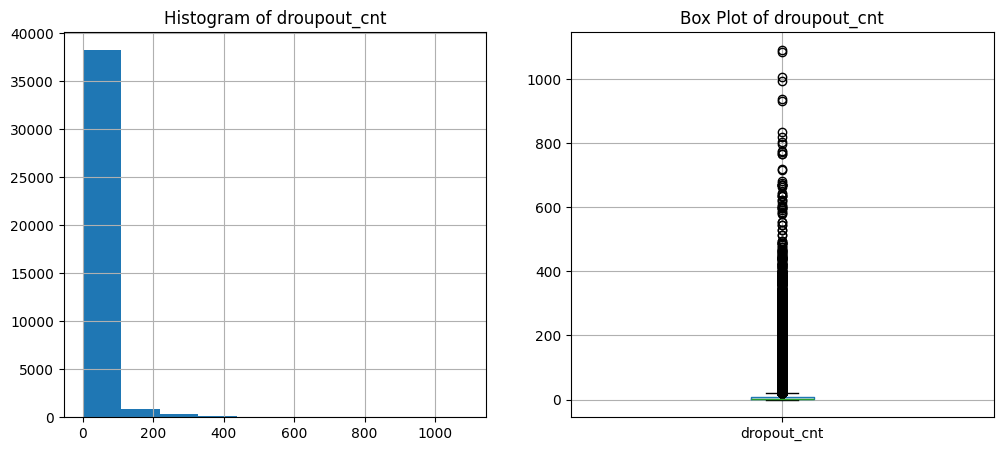

,dropout_cnt
count,39674.0
mean,16.239225
std,50.129834
min,0.0
25%,1.0
50%,3.0
75%,9.0
max,1091.0


In [92]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histogram on the first subplot (axes[0])
df['dropout_cnt'].hist(ax=axes[0])
axes[0].set_title('Histogram of droupout_cnt')

# Plot boxplot on the second subplot (axes[1])
df[['dropout_cnt']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of droupout_cnt')

plt.show()

df['dropout_cnt'].describe()

It is right skewed ,the maximum count is between 1 to 200.

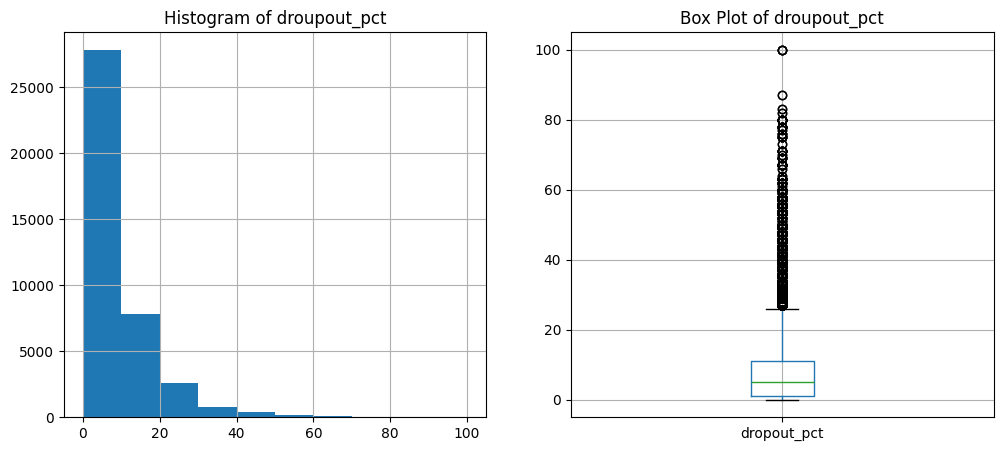

,dropout_pct
count,39674.000000
mean,7.963049
std,9.658698
min,0.000000
25%,1.000000
50%,5.000000
75%,11.000000
max,100.000000


In [93]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histogram on the first subplot (axes[0])
df['dropout_pct'].hist(ax=axes[0])
axes[0].set_title('Histogram of droupout_pct')

# Plot boxplot on the second subplot (axes[1])
df[['dropout_pct']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of droupout_pct')

plt.show()

df['dropout_pct'].describe()

### **Bi Varient Analysis**

Categorical Variables (Qualitative Information) These variables provide descriptive information and represent labels or categories.

report_school_year (object) Qualitative: Academic year (e.g., "2020-2021").

aggregation_type (object) Qualitative: Type of aggregation (e.g., district, county, state).

aggregation_name (object) Qualitative: Name associated with the aggregation (e.g., a district or county name).

nrc_desc (object) Qualitative: Description of the NRC classification.

county_name (object) Qualitative: Name of the county.

membership_desc (object) Qualitative: Description of the student group or membership.

subgroup_name (object) Qualitative: Name of the subgroup (e.g., Hispanic, Students with Disabilities).

Columns Represented as Numeric Codes (Categorical-like Identifiers) Even though these are stored as numbers, they serve as identifiers or codes rather than continuous measurements.

aggregation_index (int64) Quantitative Identifier: Numeric ID used for aggregation.

nrc_code (int64) Quantitative Identifier: Numeric code categorizing schools/districts under an NRC classification.

county_code (int64) Quantitative Identifier: Numeric code identifying the county.

nyc_ind (int64) Categorical (Binary): Indicates if the school/district is in NYC (1 = NYC, 0 = Other).

subgroup_code (int64) Quantitative Identifier: Numeric code representing a specific subgroup.







nyc_ind ,dropout_cnt

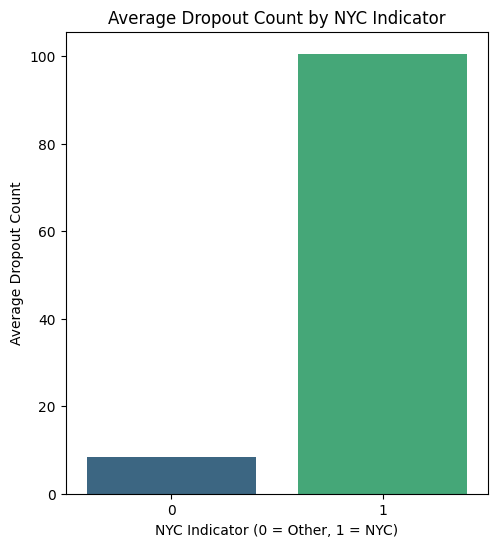

In [94]:
# Bar Plot: Average Dropout Count by NYC Indicator
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='nyc_ind', y='dropout_cnt', data=df, ci=None, palette='viridis')
plt.title('Average Dropout Count by NYC Indicator')
plt.xlabel('NYC Indicator (0 = Other, 1 = NYC)')
plt.ylabel('Average Dropout Count')

plt.show()

 From this plot we can say there are more drop_outs from schools which are in NYC from schools whch are not in NYC.

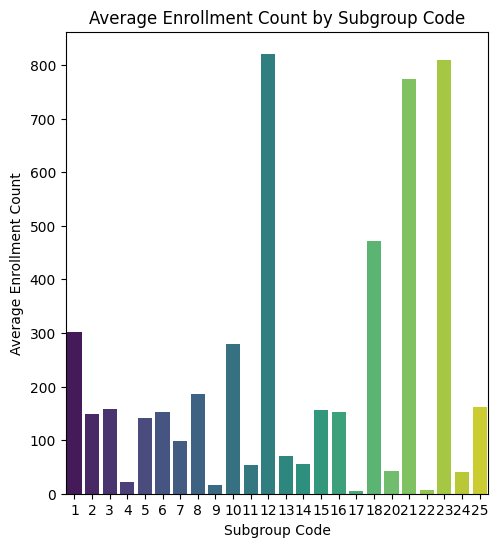

In [95]:
# Bar Plot: Average Enrollment Count by Subgroup Code
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='subgroup_code', y='enroll_cnt', data=df, ci=None, palette='viridis')
plt.title('Average Enrollment Count by Subgroup Code')
plt.xlabel('Subgroup Code')
plt.ylabel('Average Enrollment Count')

plt.show()

The bar chart shows the average enrollment count by subgroup code, with the highest enrollment around subgroup codes 12, 21, 22, and 23 (above 800), while the lowest enrollment is near subgroup codes 5, 10, 14, 18, and 24 (close to zero).

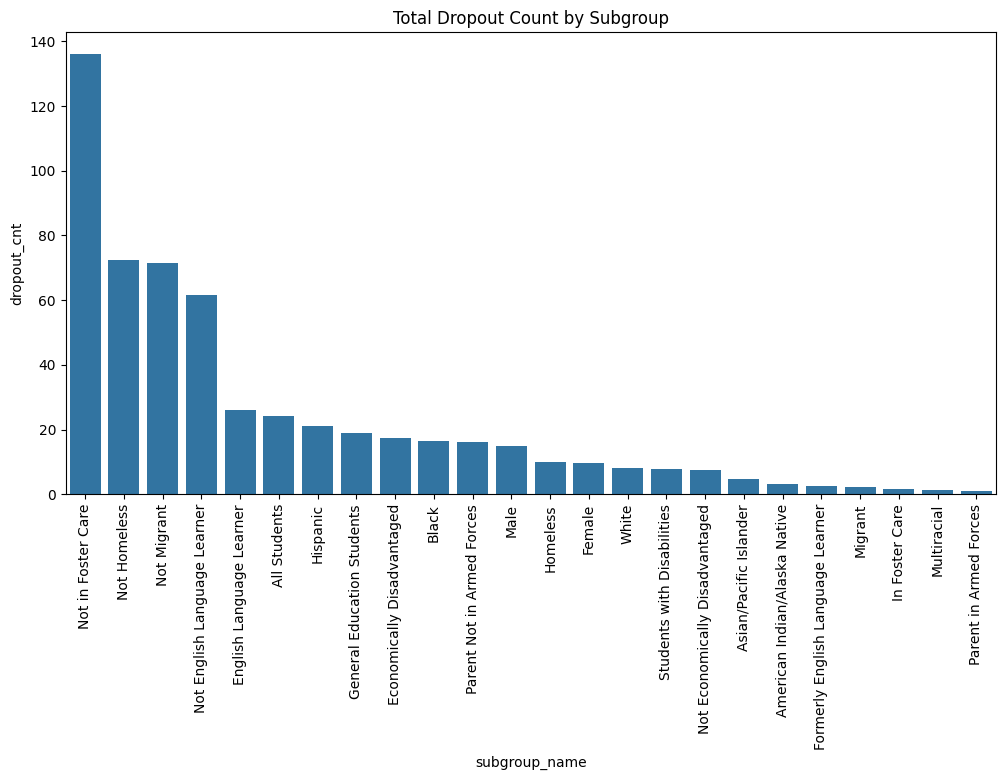

In [96]:
# Bar plot for droupout rates for subgroups
plt.figure(figsize=(12, 6))
sns.barplot(x='subgroup_name', y='dropout_cnt', data=df, ci=None, order=df.groupby('subgroup_name')['dropout_cnt'].mean().sort_values(ascending=False).index)
plt.title('Total Dropout Count by Subgroup')
plt.xticks(rotation=90)  # Rotate subgroup names for better visibility
plt.show()

the count of drop out is more in not in foster care group, and less in parent in armed forces group

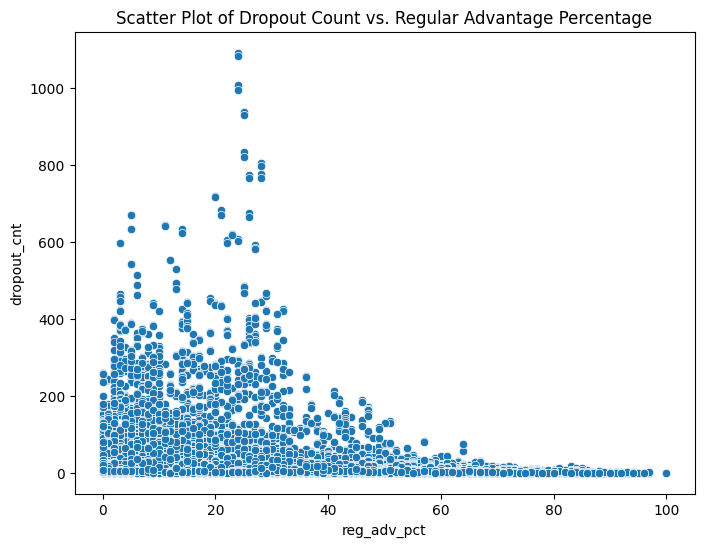

In [97]:
# Scatter plot between droupout_cnt and reg_adv_pct
plt.figure(figsize=(8, 6))
sns.scatterplot(x='reg_adv_pct', y='dropout_cnt', data=df)
plt.title('Scatter Plot of Dropout Count vs. Regular Advantage Percentage')
plt.show()

The scatter plot shows that when the regular advantage percentage is low (0–20%), dropout counts are very high (600–1000). As the percentage increases, dropout numbers go down. After 40%, there are fewer dropouts, and above 80%, almost none. This means schools or groups with less advantage tend to have more dropouts.

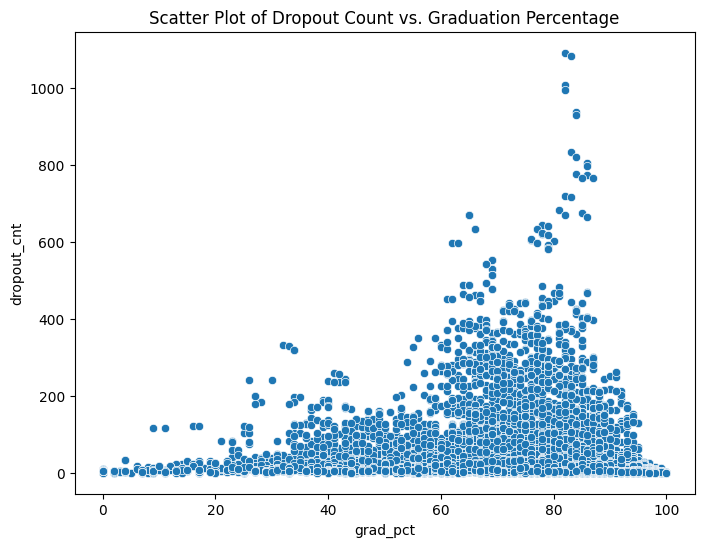

In [98]:
# Scatter plot between droupout_cnt and reg_adv_pct
plt.figure(figsize=(8, 6))
sns.scatterplot(x='grad_pct', y='dropout_cnt', data=df)
plt.title('Scatter Plot of Dropout Count vs. Graduation Percentage')
plt.show()

The scatter plot shows that dropout counts tend to be higher when the graduation percentage is between 60% and 80%, with some extreme cases reaching above 1000 dropouts. When the graduation percentage is very low (0–20%), dropout counts are generally low, but as graduation rates increase, more dropouts appear. However, at higher graduation rates (above 80%), dropout counts begin to decrease again. This suggests that schools with moderate graduation rates experience the highest dropout numbers.

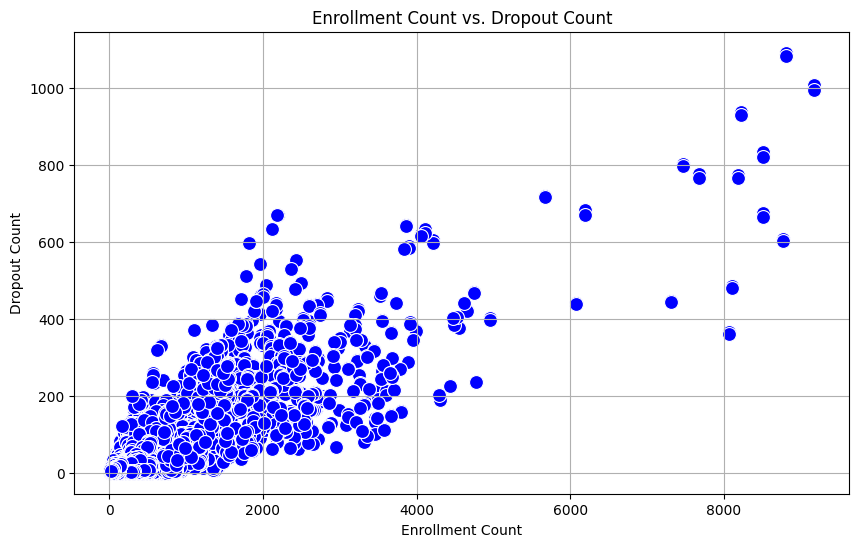

In [99]:
# Scatter Plot: Enrollment Count vs. Dropout Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='enroll_cnt', y='dropout_cnt', data=df, s=100, color='b', marker='o')
plt.title('Enrollment Count vs. Dropout Count')
plt.xlabel('Enrollment Count')
plt.ylabel('Dropout Count')
plt.grid(True)
plt.show()

The scatter plot shows the relationship between enrollment count (x-axis) and dropout count (y-axis), indicating a positive correlation—as enrollment increases, dropout counts also tend to rise. Most data points cluster at lower enrollment levels (under 4000), with dropout counts ranging up to 600. However, at higher enrollment levels (above 6000), dropout counts become more spread out, reaching above 1000 in some cases.

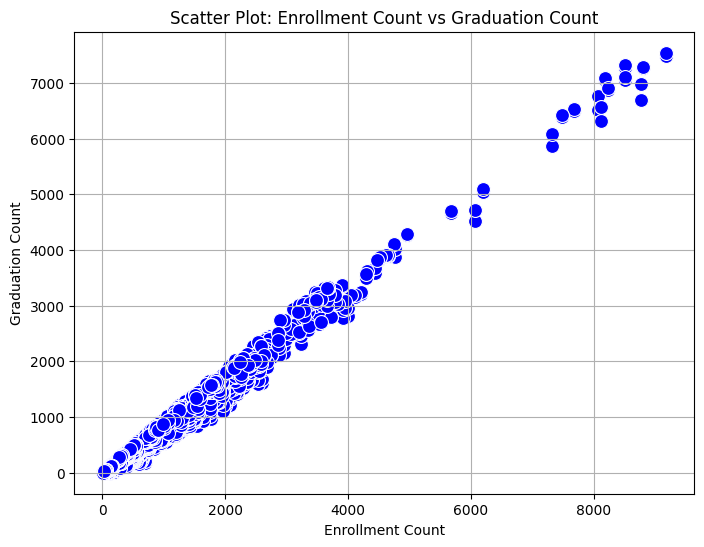

In [100]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='enroll_cnt', y='grad_cnt', data=df, s=100, color='blue')
plt.title('Scatter Plot: Enrollment Count vs Graduation Count')
plt.xlabel('Enrollment Count')
plt.ylabel('Graduation Count')
plt.grid(True)
plt.show()

This scatter plot shows the relationship between enrollment count (x-axis) and graduation count (y-axis). The points form a clear positive linear trend, meaning that as enrollment increases, the number of graduates also rises proportionally. This suggests that most students who enroll eventually graduate, with only minor variations. The strong correlation indicates that schools with higher enrollments also tend to have higher graduation numbers.

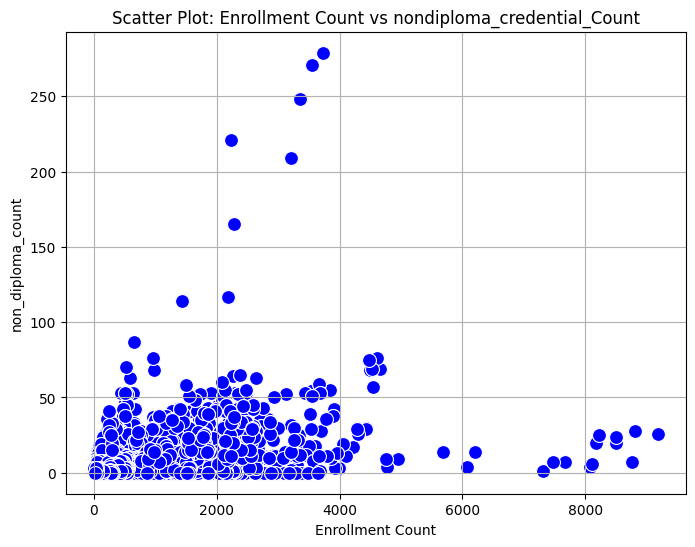

In [101]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='enroll_cnt', y='non_diploma_credential_cnt', data=df, s=100, color='blue')
plt.title('Scatter Plot: Enrollment Count vs nondiploma_credential_Count')
plt.xlabel('Enrollment Count')
plt.ylabel('non_diploma_count')
plt.grid(True)
plt.show()

This scatter plot shows the relationship between enrollment count (x-axis) and non-diploma credential count (y-axis). The data points are mostly clustered at the lower end, indicating that most schools have a relatively small number of students receiving non-diploma credentials. However, a few schools have significantly higher counts, reaching over 250. There doesn’t appear to be a strong trend, suggesting that enrollment size doesn’t directly determine the number of non-diploma credentials awarded

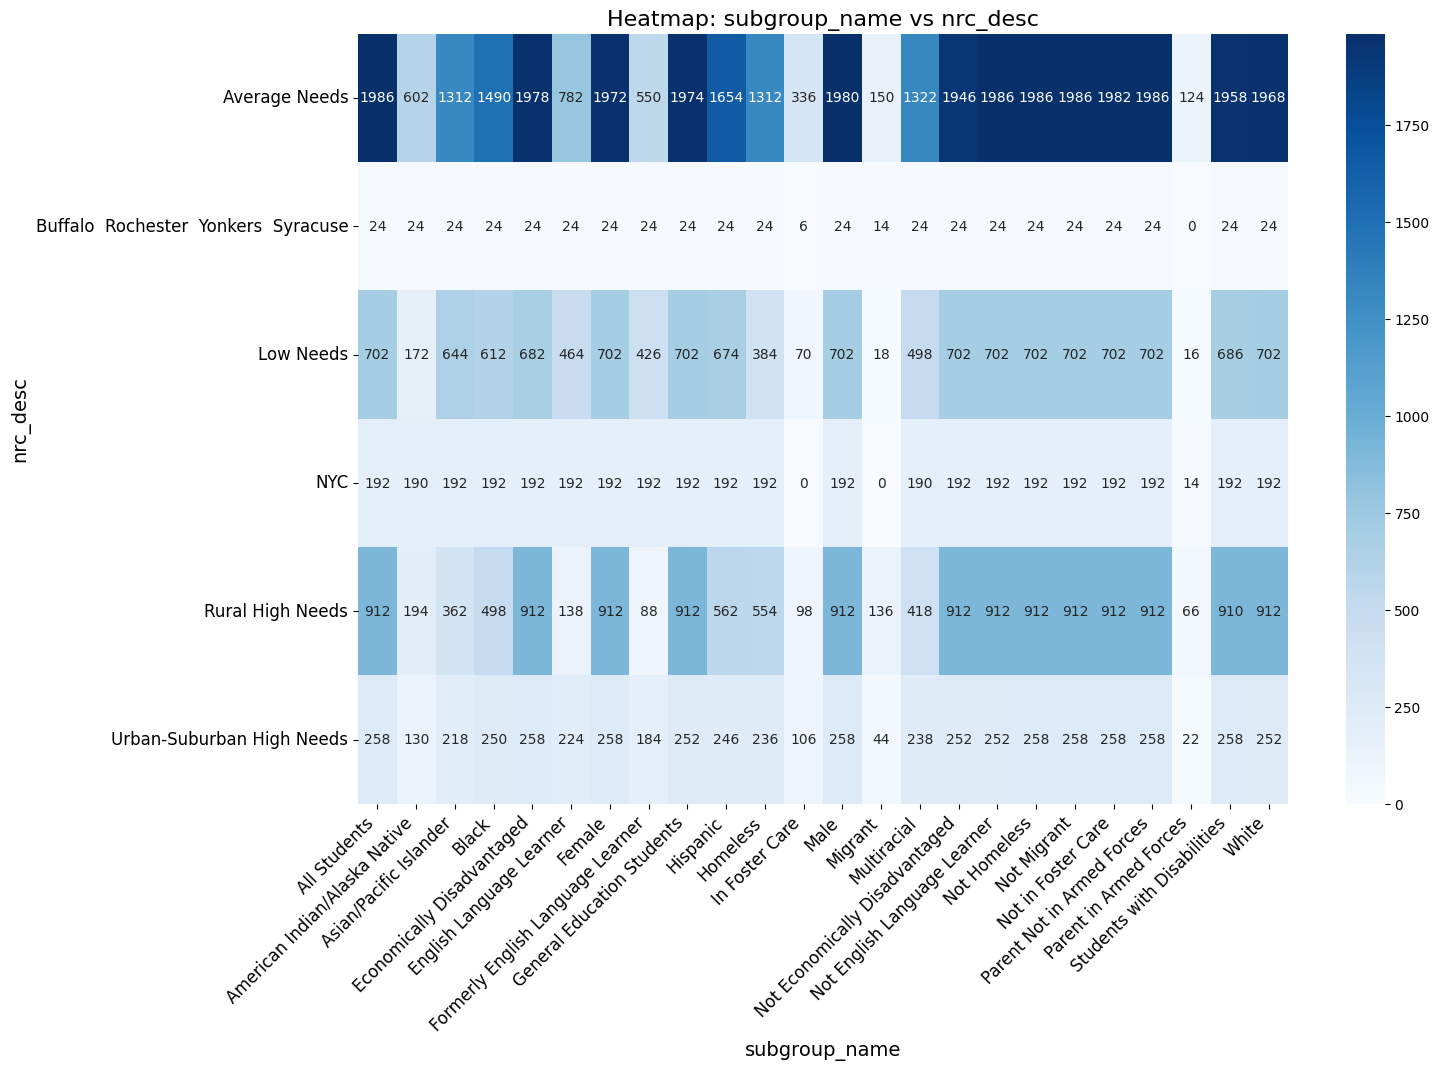

In [102]:
# Create a pivot table for the heatmap
#Pivot table arrange the data in 2d format for easy visualization in heatmap.
pivot_table = df.pivot_table(index='nrc_desc', columns='subgroup_name', aggfunc='size', fill_value=0)

# Increase figure size
plt.figure(figsize=(15, 10))

# Plot the heatmap
# Use fmt='d' for integer formatting
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt='d')

plt.title('Heatmap: subgroup_name vs nrc_desc', fontsize=16)
plt.xlabel('subgroup_name', fontsize=14)
plt.ylabel('nrc_desc', fontsize=14)
plt.xticks(rotation=45, ha='right',fontsize=12)  # Rotate x-ticks for better readability
plt.yticks(fontsize=12)
plt.show()

This heatmap shows the number of students in different categories across various school types.

Darker blue means more students, and lighter blue means fewer students.
"Average Needs" schools have the highest numbers in most categories.
NYC schools have low but steady numbers.
Rural High Needs and Urban-Suburban High Needs schools have moderate numbers.
Buffalo, Rochester, Yonkers, and Syracuse have the same low count (24) across all groups.

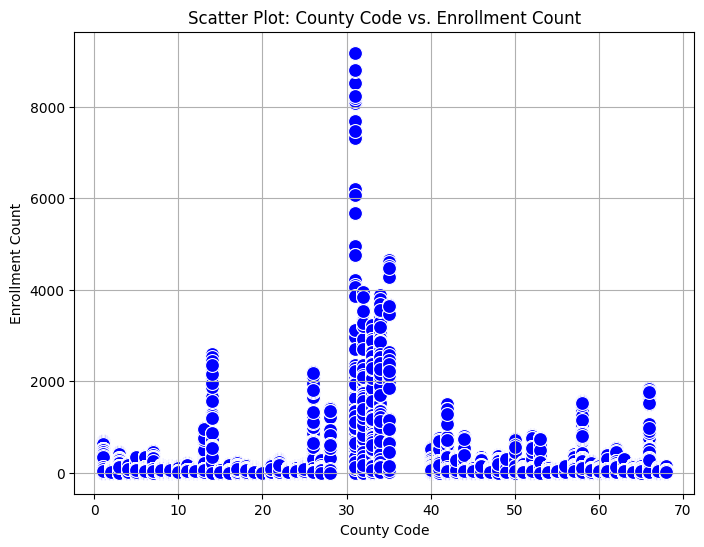

In [103]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='county_code', y='enroll_cnt', data=df, s=100, color='blue')
plt.title('Scatter Plot: County Code vs. Enrollment Count')
plt.xlabel('County Code')
plt.ylabel('Enrollment Count')
plt.grid(True)
plt.show()

This scatter plot shows enrollment counts for different county codes, with some counties (e.g., around code 30) having significantly higher enrollments. The data highlights variations in student distribution across counties

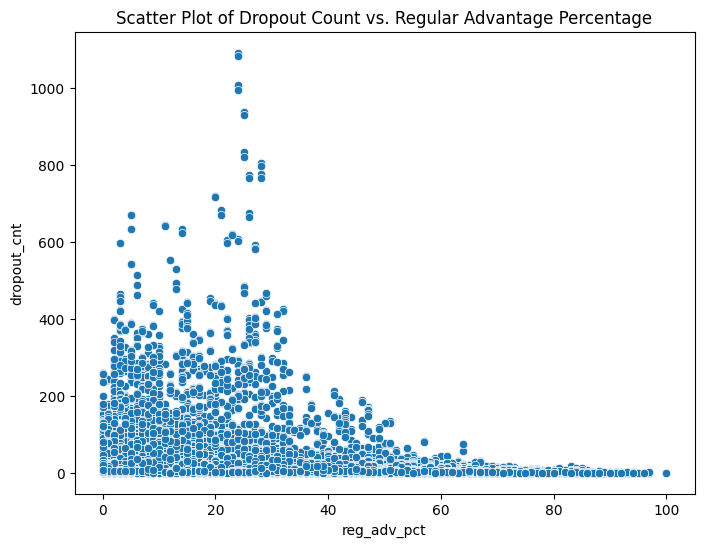

In [104]:
# Scatter plot between droupout_cnt and reg_adv_pct
plt.figure(figsize=(8, 6))
sns.scatterplot(x='reg_adv_pct', y='dropout_cnt', data=df)
plt.title('Scatter Plot of Dropout Count vs. Regular Advantage Percentage')
plt.show()

This scatter plot shows the relationship between dropout count and regular advantage percentage. As the regular advantage percentage increases, the dropout count tends to decrease.

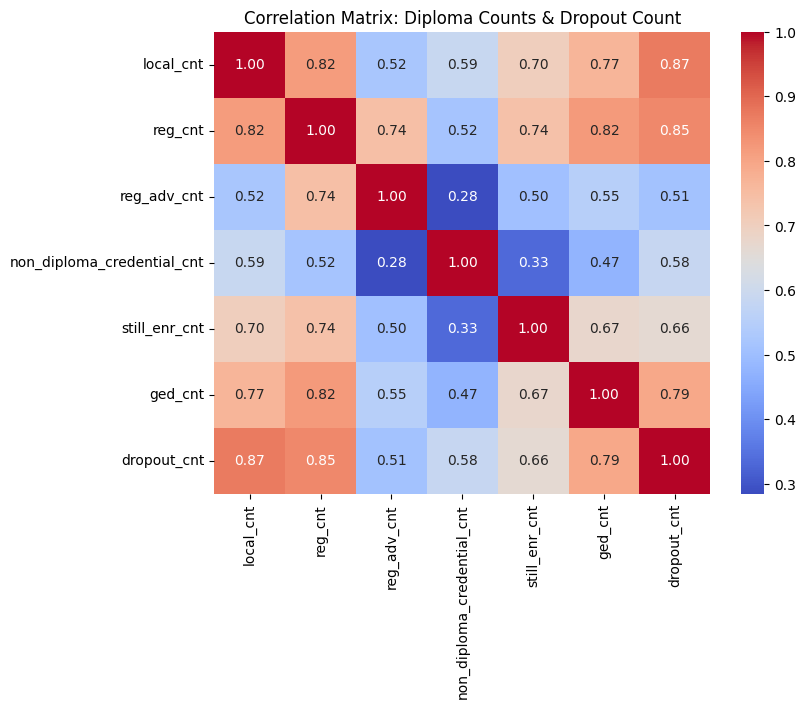

In [105]:
columns_of_interest1 = ['local_cnt',
        'reg_cnt',  'reg_adv_cnt',
       'non_diploma_credential_cnt',
       'still_enr_cnt',  'ged_cnt','dropout_cnt']

# Convert the columns to numeric in case they are stored as objects
for col in columns_of_interest1:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Compute the correlation matrix
corr_matrix = df[columns_of_interest1].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Diploma Counts & Dropout Count")
plt.show()

Dropout rates strongly correlate with local diplomas (0.87) and GEDs (0.79), indicating many dropouts pursue these paths. Higher dropout counts also link to more students still enrolled (0.66) or earning non-diploma credentials (0.58). Advanced diplomas show weaker ties to dropouts, suggesting lower impact.

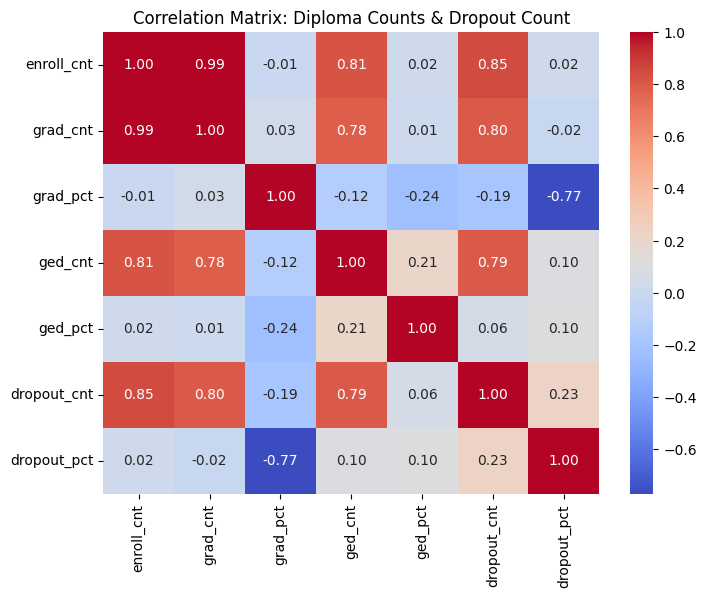

In [106]:
columns_of_interest2 = ['enroll_cnt', 'grad_cnt', 'grad_pct',
         'ged_cnt', 'ged_pct', 'dropout_cnt', 'dropout_pct']

# Convert the columns to numeric in case they are stored as objects
for col in columns_of_interest2:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Compute the correlation matrix
corr_matrix = df[columns_of_interest2].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Diploma Counts & Dropout Count")
plt.show()

The heatmap analysis reveals strong positive correlations between enrollment and graduation counts (0.99), enrollment and dropout counts (0.85), and dropout counts with GED counts (0.79). Negative correlations include dropout percentage with graduation percentage (-0.77) and graduation percentage with GED counts (-0.12). In summary, higher enrollment leads to more graduates and dropouts, while improving graduation rates can reduce dropouts and GED pursuit.

### **Data prepararation**

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   report_school_year          73152 non-null  object 
 1   aggregation_index           73152 non-null  object 
 2   aggregation_type            73152 non-null  object 
 3   aggregation_name            73152 non-null  object 
 4   nrc_code                    73152 non-null  object 
 5   nrc_desc                    73152 non-null  object 
 6   county_code                 73152 non-null  object 
 7   county_name                 73152 non-null  object 
 8   nyc_ind                     73152 non-null  object 
 9   membership_desc             73152 non-null  object 
 10  subgroup_code               73152 non-null  object 
 11  subgroup_name               73152 non-null  object 
 12  enroll_cnt                  39674 non-null  Int64  
 13  grad_cnt                    396

In [108]:
# List of count columns (these should be converted to int)
count_columns = [
    'aggregation_index', 'nrc_code', 'county_code', 'subgroup_code', 'enroll_cnt',
    'grad_cnt', 'local_cnt', 'reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt',
    'still_enr_cnt', 'ged_cnt', 'dropout_cnt'
]

# List of percentage columns (these should be converted to floats)
percentage_columns = [
    'grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct',
    'still_enr_pct', 'ged_pct', 'dropout_pct'
]

# Convert count columns to numeric, coercing errors to NaN, then to integers
df[count_columns] = df[count_columns].apply(pd.to_numeric, errors='coerce').round().astype('Int64')

# Convert percentage columns to numeric, coercing errors to NaN, then to floats with 2 decimal places
df[percentage_columns] = df[percentage_columns].apply(pd.to_numeric, errors='coerce').round(2)


In [109]:
# Check for nulls
df.isnull().sum()

,0
report_school_year,0
aggregation_index,0
aggregation_type,0
aggregation_name,0
nrc_code,0
nrc_desc,0
county_code,0
county_name,0
nyc_ind,0
membership_desc,0


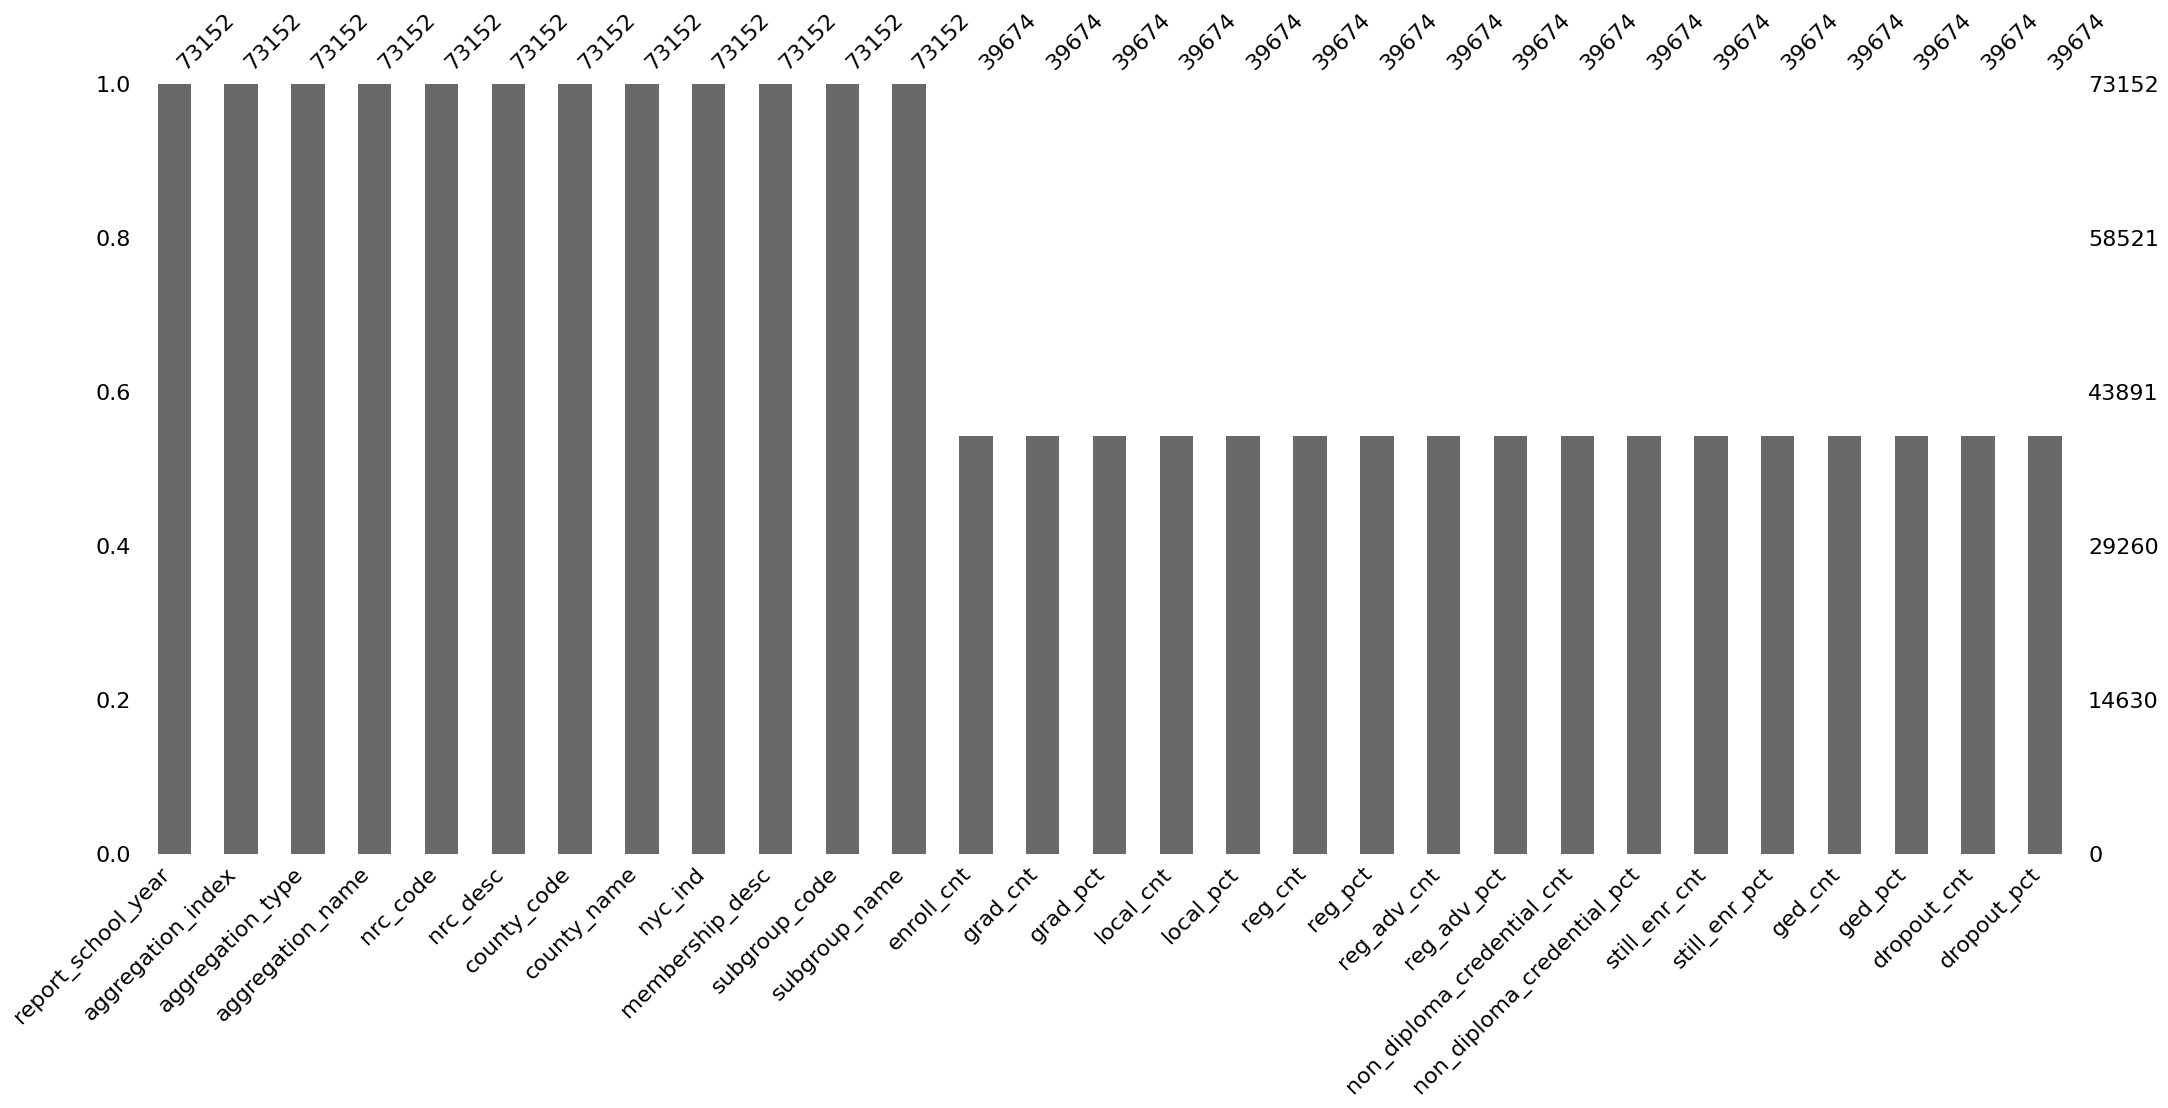

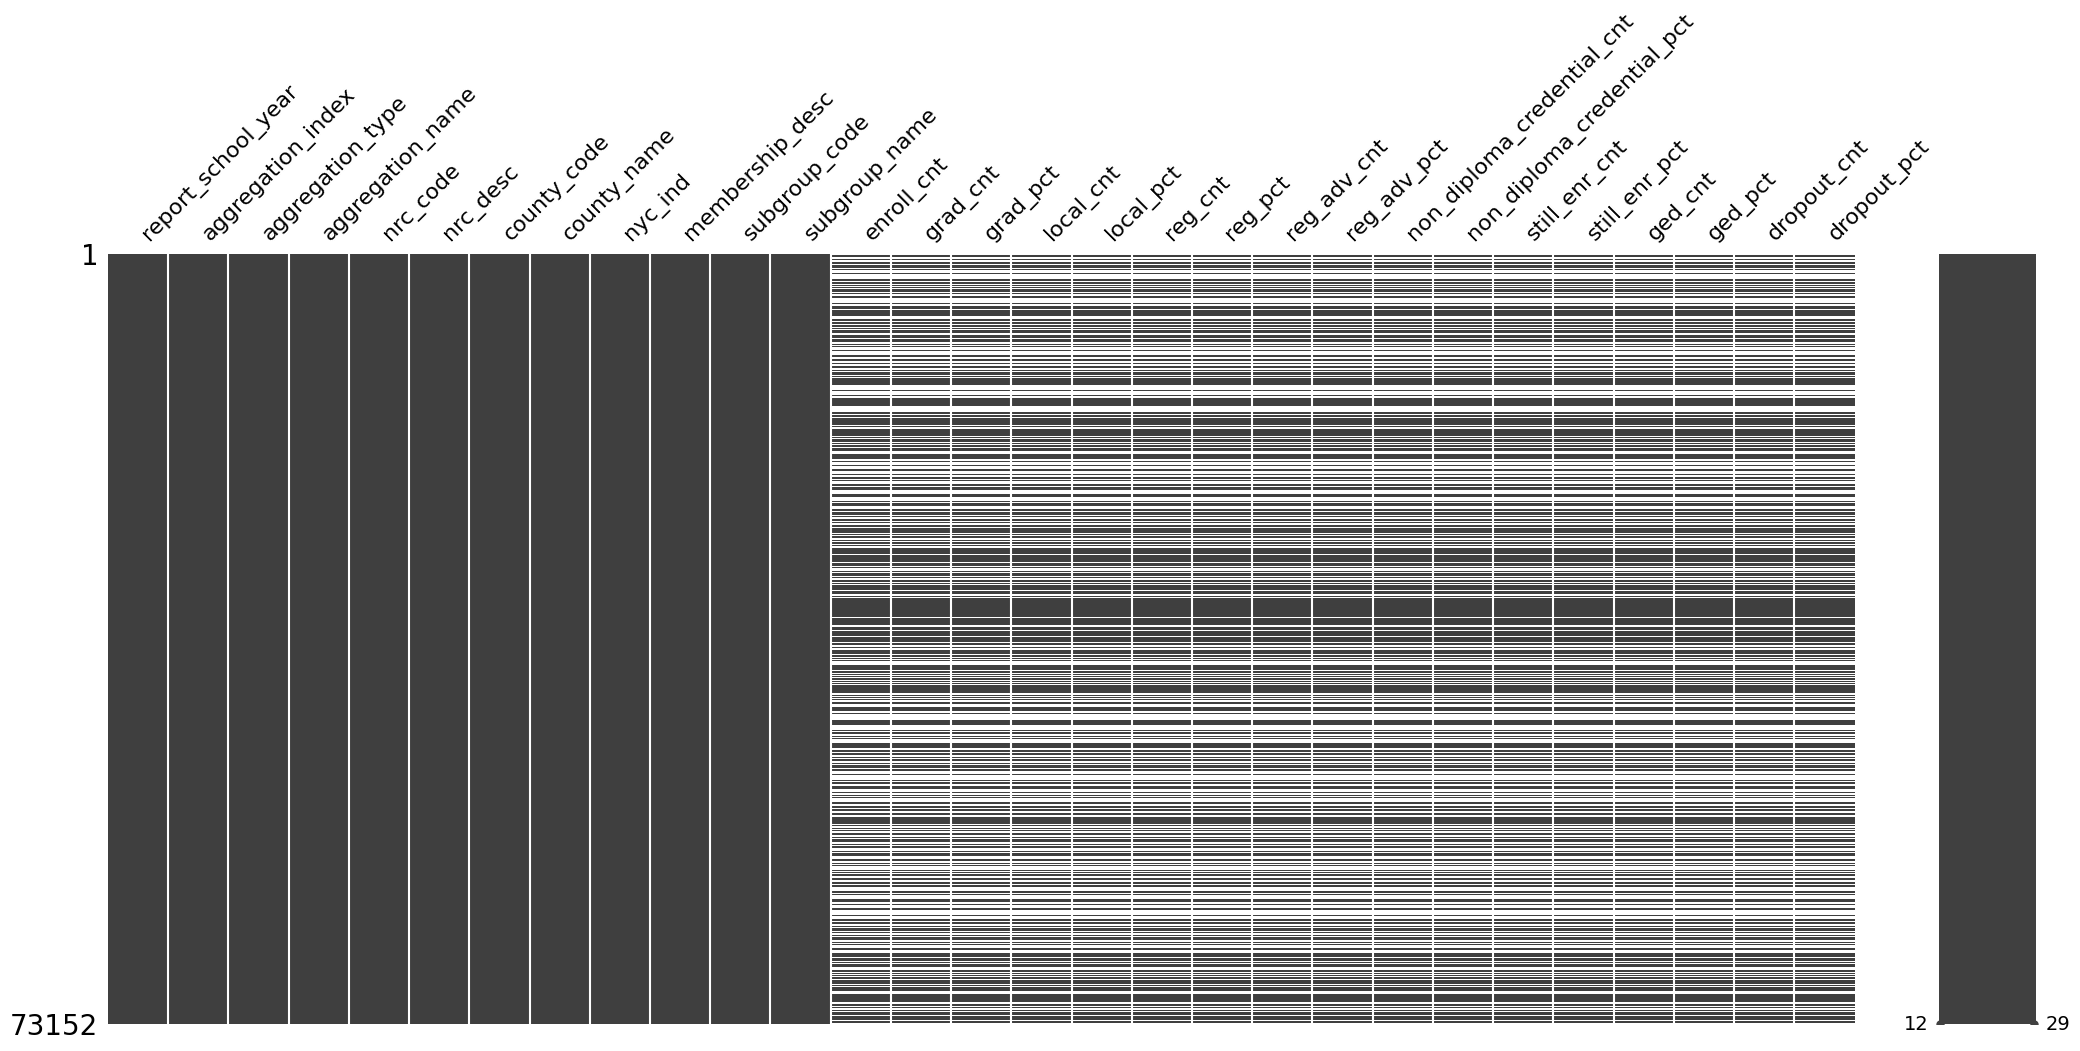

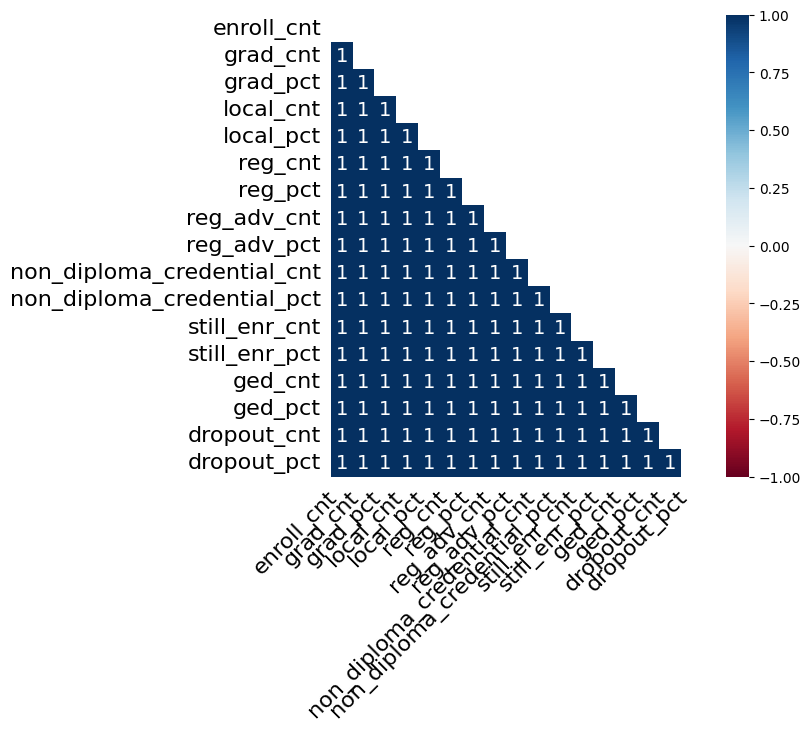

In [110]:
#Using missingnos matrix, we can check if there is any pattern to the missing data of all the numeric attributes.
!pip install missingno

import missingno as msno

# Using missingnos matrix, we can check if there is any pattern to the missing data of all the numeric attributes.

# Visualize the amount of missing data using missingno's bar chart.
msno.bar(df[columns]);

# To see if there is a pattern to the missing data.
a = msno.matrix(df[columns])
a.get_figure();

# Plot a heat map of the missing data to see if the locations where the data are missing are correlated.
# Code as referenced in O'Reilley's Machine Learning Pocket Reference.

a = msno.heatmap(df[columns], figsize = (6,6))
a.get_figure();

In [111]:
import missingno as msno

# Using missingnos matrix, we can check if there is any pattern to the missing data of all the numeric attributes.

# Visualize the amount of missing data using missingno's bar chart.

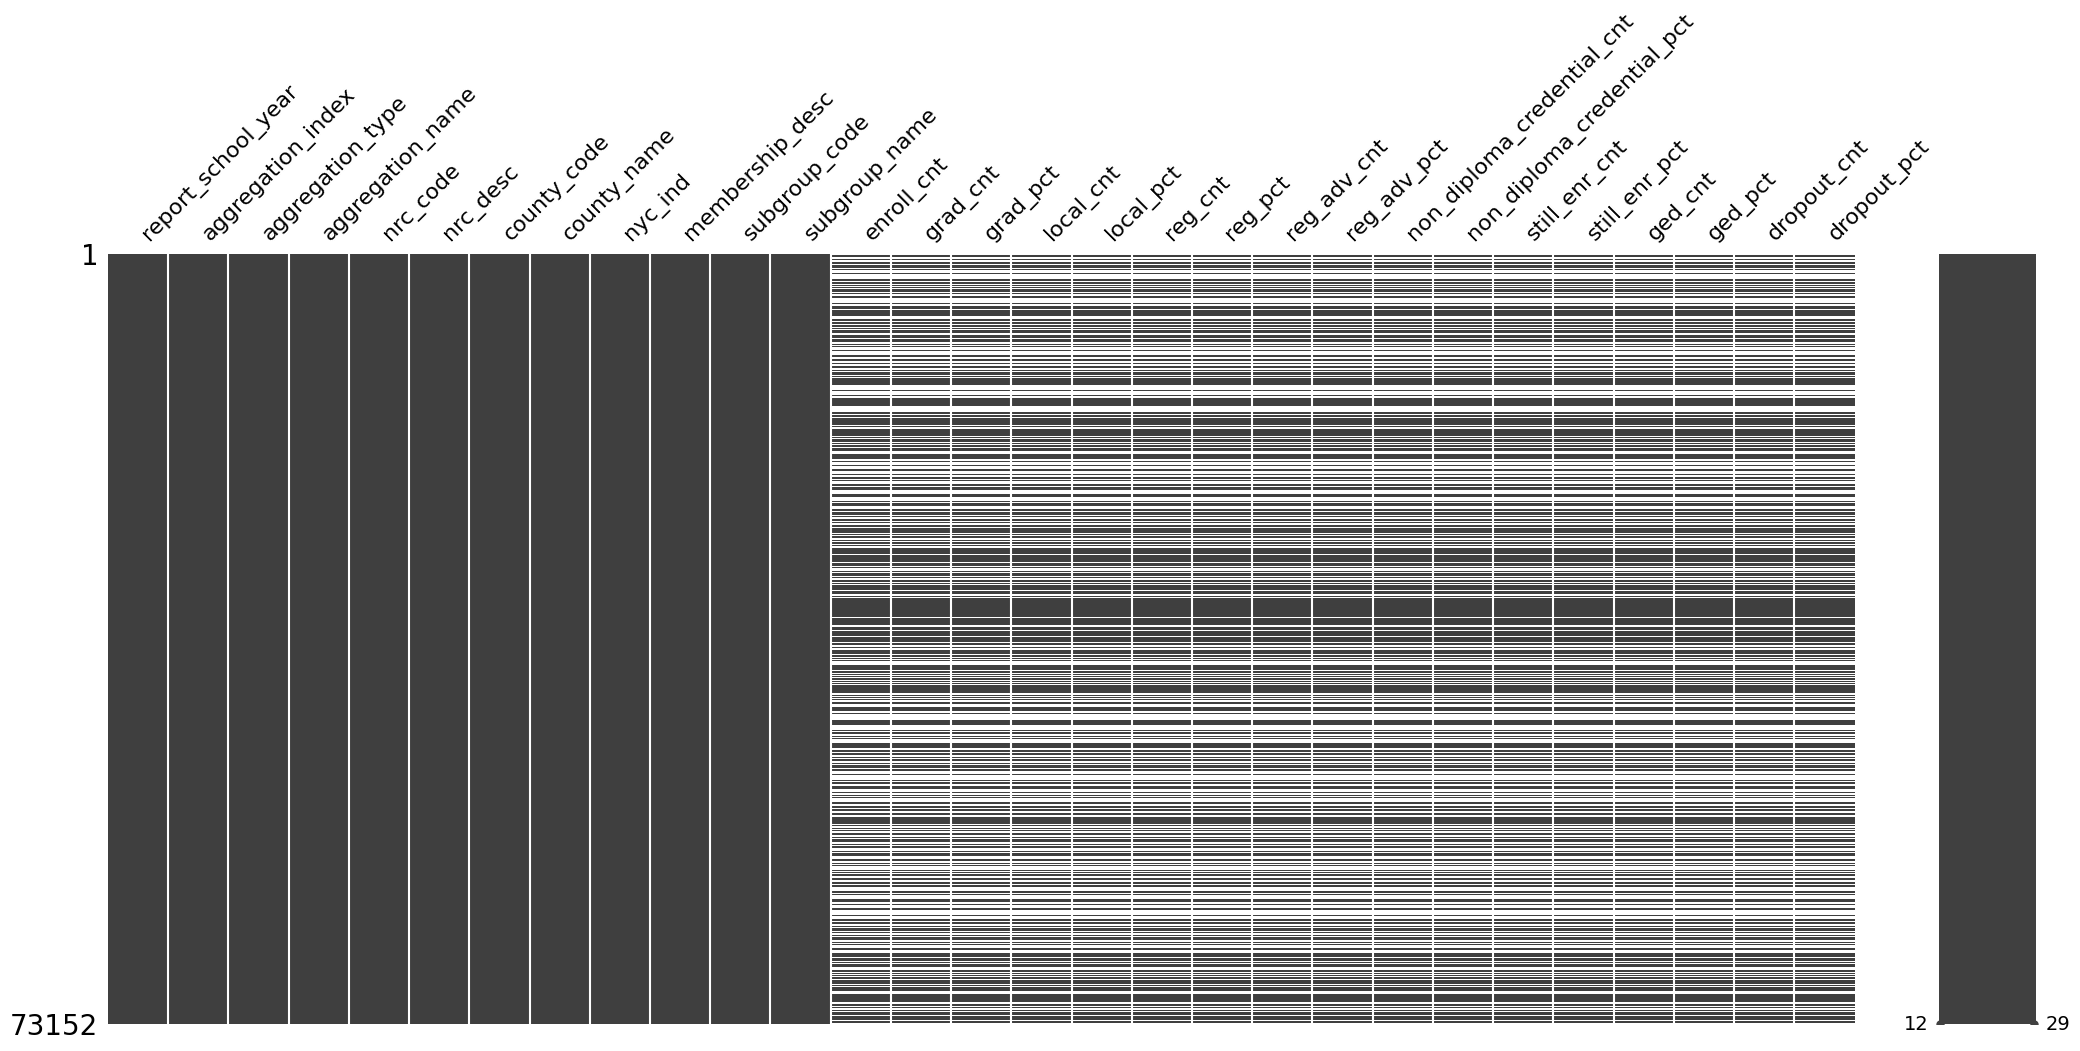

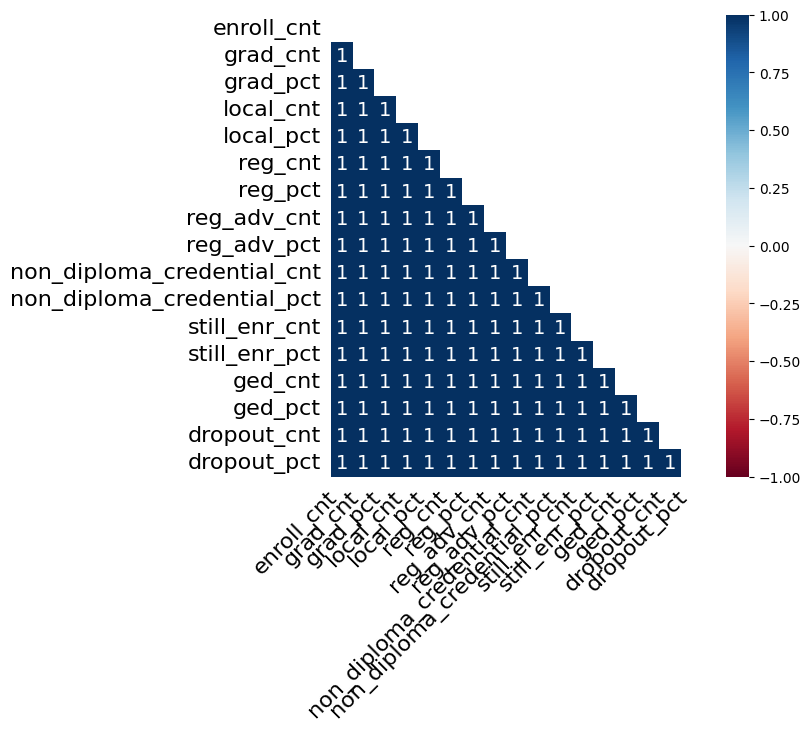

In [112]:
import missingno as msno
import matplotlib.pyplot as plt



# To see if there is a pattern to the missing data
msno.matrix(df)
plt.show()

# Plot a heatmap of the missing data to see if the missing data is correlated
msno.heatmap(df, figsize=(6,6))
plt.show()


The bar plot and heatmap show that all numeric columns have missing values in the same rows. This suggests a clear pattern rather than random missing data. The heatmap also indicates a strong positive correlation among these columns, meaning they are closely related.

In [113]:
cols = ['enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt',
       'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt',
       'dropout_pct']

In [114]:
from sklearn.impute import KNNImputer
# Initialize and apply KNN Imputer
imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df[cols]), columns=cols)

df_imputed.head()

,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,658.000000,464.000000,71.000000,63.000000,10.000000,310.000000,47.000000,91.000000,14.000000,16.000000,2.000000,30.000000,5.000000,0.000000,0.000000,148.000000,22.000000
1,324.000000,246.000000,76.000000,30.000000,9.000000,169.000000,52.000000,47.000000,15.000000,2.000000,1.000000,11.000000,3.000000,0.000000,0.000000,65.000000,20.000000
2,334.000000,218.000000,65.000000,33.000000,10.000000,141.000000,42.000000,44.000000,13.000000,14.000000,4.000000,19.000000,6.000000,0.000000,0.000000,83.000000,25.000000
3,192.120079,161.178354,84.406614,12.340903,8.479936,86.804708,43.371125,62.032742,32.577204,1.924485,1.742627,11.299516,5.190704,1.377577,0.612693,16.239225,7.963049
4,367.000000,248.000000,68.000000,42.000000,11.000000,183.000000,50.000000,23.000000,6.000000,10.000000,3.000000,18.000000,5.000000,0.000000,0.000000,91.000000,25.000000


The code uses the KNNImputer from sklearn to fill missing values in specified columns (cols) of the DataFrame df using the mean of the 3 nearest neighbors. The imputed data is then stored in df_imputed.

In [115]:
df[cols] = df_imputed

In [116]:
df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91.000000,14.000000,16.000000,2.000000,30.000000,5.000000,0.000000,0.000000,148.000000,22.000000
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47.000000,15.000000,2.000000,1.000000,11.000000,3.000000,0.000000,0.000000,65.000000,20.000000
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44.000000,13.000000,14.000000,4.000000,19.000000,6.000000,0.000000,0.000000,83.000000,25.000000
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,62.032742,32.577204,1.924485,1.742627,11.299516,5.190704,1.377577,0.612693,16.239225,7.963049
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23.000000,6.000000,10.000000,3.000000,18.000000,5.000000,0.000000,0.000000,91.000000,25.000000


In [117]:
df.isnull().sum()

,0
report_school_year,0
aggregation_index,0
aggregation_type,0
aggregation_name,0
nrc_code,0
nrc_desc,0
county_code,0
county_name,0
nyc_ind,0
membership_desc,0


Treating outliers: Based on domain knowledge, student enrollment numbers can vary widely, ranging from a single student to over a thousand. Therefore, it's unnecessary to treat these variations as outliers. However, it's essential to ensure that there are no negative enrollment values, as negative numbers are not valid

In [118]:
import pandas as pd


columns_to_drop = ['report_school_year', 'aggregation_index', 'aggregation_type',
                   'nrc_desc', 'county_name', 'subgroup_name', 'aggregation_name']

df.drop(columns=columns_to_drop, inplace=True)


 code drops the specified columns (report_school_year, aggregation_index, etc.) from the DataFrame df because they are not useful for modeling purposes

In [119]:
df_data=df.copy()

In [120]:
unique_membership_desc = df['membership_desc'].unique()
print(unique_membership_desc)

['2013 Total Cohort - 6 Year Outcome' '2014 Total Cohort - 5 Year Outcome'
 '2015 Total Cohort - 4 Year Outcome'
 '2014 Total Cohort - 5 Year Outcome - August 2019'
 '2015 Total Cohort - 4 Year Outcome - August 2019'
 '2013 Total Cohort - 6 Year Outcome - August 2019']


In [121]:
print(df.head)
print(df_data.head)

<bound method NDFrame.head of        nrc_code  county_code nyc_ind  \
0             3            1       0   
1             3            1       0   
2             3            1       0   
3             3            1       0   
4             3            1       0   
...         ...          ...     ...   
73147         4           68       0   
73148         4           68       0   
73149         4           68       0   
73150         4           68       0   
73151         4           68       0   

                                        membership_desc  subgroup_code  \
0                    2013 Total Cohort - 6 Year Outcome              1   
1                    2013 Total Cohort - 6 Year Outcome              2   
2                    2013 Total Cohort - 6 Year Outcome              3   
3                    2013 Total Cohort - 6 Year Outcome              4   
4                    2013 Total Cohort - 6 Year Outcome              5   
...                                          

In [122]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df_data, columns=["membership_desc"], drop_first=False)

# Convert boolean columns to integers
dummy_columns = [col for col in df_encoded.columns if col.startswith('membership_desc')]
df_encoded[dummy_columns] = df_encoded[dummy_columns].astype(int)

# Display the first 20 rows of the encoded DataFrame
df_encoded.head(5)


,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,...,ged_cnt,ged_pct,dropout_cnt,dropout_pct,membership_desc_2013 Total Cohort - 6 Year Outcome,membership_desc_2013 Total Cohort - 6 Year Outcome - August 2019,membership_desc_2014 Total Cohort - 5 Year Outcome,membership_desc_2014 Total Cohort - 5 Year Outcome - August 2019,membership_desc_2015 Total Cohort - 4 Year Outcome,membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019
0,3,1,0,1,658.000000,464.000000,71.000000,63.000000,10.000000,310.000000,...,0.000000,0.000000,148.000000,22.000000,1,0,0,0,0,0
1,3,1,0,2,324.000000,246.000000,76.000000,30.000000,9.000000,169.000000,...,0.000000,0.000000,65.000000,20.000000,1,0,0,0,0,0
2,3,1,0,3,334.000000,218.000000,65.000000,33.000000,10.000000,141.000000,...,0.000000,0.000000,83.000000,25.000000,1,0,0,0,0,0
3,3,1,0,4,192.120079,161.178354,84.406614,12.340903,8.479936,86.804708,...,1.377577,0.612693,16.239225,7.963049,1,0,0,0,0,0
4,3,1,0,5,367.000000,248.000000,68.000000,42.000000,11.000000,183.000000,...,0.000000,0.000000,91.000000,25.000000,1,0,0,0,0,0


In [123]:
df.actual_data_for_model=df_encoded.copy()


In [124]:
df.actual_data_for_model

,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,...,ged_cnt,ged_pct,dropout_cnt,dropout_pct,membership_desc_2013 Total Cohort - 6 Year Outcome,membership_desc_2013 Total Cohort - 6 Year Outcome - August 2019,membership_desc_2014 Total Cohort - 5 Year Outcome,membership_desc_2014 Total Cohort - 5 Year Outcome - August 2019,membership_desc_2015 Total Cohort - 4 Year Outcome,membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019
0,3,1,0,1,658.000000,464.000000,71.000000,63.000000,10.000000,310.000000,...,0.000000,0.000000,148.000000,22.000000,1,0,0,0,0,0
1,3,1,0,2,324.000000,246.000000,76.000000,30.000000,9.000000,169.000000,...,0.000000,0.000000,65.000000,20.000000,1,0,0,0,0,0
2,3,1,0,3,334.000000,218.000000,65.000000,33.000000,10.000000,141.000000,...,0.000000,0.000000,83.000000,25.000000,1,0,0,0,0,0
3,3,1,0,4,192.120079,161.178354,84.406614,12.340903,8.479936,86.804708,...,1.377577,0.612693,16.239225,7.963049,1,0,0,0,0,0
4,3,1,0,5,367.000000,248.000000,68.000000,42.000000,11.000000,183.000000,...,0.000000,0.000000,91.000000,25.000000,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,4,68,0,18,192.120079,161.178354,84.406614,12.340903,8.479936,86.804708,...,1.377577,0.612693,16.239225,7.963049,0,1,0,0,0,0
73148,4,68,0,20,192.120079,161.178354,84.406614,12.340903,8.479936,86.804708,...,1.377577,0.612693,16.239225,7.963049,0,1,0,0,0,0
73149,4,68,0,21,192.120079,161.178354,84.406614,12.340903,8.479936,86.804708,...,1.377577,0.612693,16.239225,7.963049,0,1,0,0,0,0
73150,4,68,0,23,192.120079,161.178354,84.406614,12.340903,8.479936,86.804708,...,1.377577,0.612693,16.239225,7.963049,0,1,0,0,0,0


In [125]:
df.actual_data_for_model.columns

Index(['nrc_code', 'county_code', 'nyc_ind', 'subgroup_code', 'enroll_cnt',
       'grad_cnt', 'grad_pct', 'local_cnt', 'local_pct', 'reg_cnt', 'reg_pct',
       'reg_adv_cnt', 'reg_adv_pct', 'non_diploma_credential_cnt',
       'non_diploma_credential_pct', 'still_enr_cnt', 'still_enr_pct',
       'ged_cnt', 'ged_pct', 'dropout_cnt', 'dropout_pct',
       'membership_desc_2013 Total Cohort - 6 Year Outcome',
       'membership_desc_2013 Total Cohort - 6 Year Outcome - August 2019',
       'membership_desc_2014 Total Cohort - 5 Year Outcome',
       'membership_desc_2014 Total Cohort - 5 Year Outcome - August 2019',
       'membership_desc_2015 Total Cohort - 4 Year Outcome',
       'membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019'],
      dtype='object')

In [126]:
df_data.head()

,nrc_code,county_code,nyc_ind,membership_desc,subgroup_code,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,3,1,0,2013 Total Cohort - 6 Year Outcome,1,658.000000,464.000000,71.000000,63.000000,10.000000,...,91.000000,14.000000,16.000000,2.000000,30.000000,5.000000,0.000000,0.000000,148.000000,22.000000
1,3,1,0,2013 Total Cohort - 6 Year Outcome,2,324.000000,246.000000,76.000000,30.000000,9.000000,...,47.000000,15.000000,2.000000,1.000000,11.000000,3.000000,0.000000,0.000000,65.000000,20.000000
2,3,1,0,2013 Total Cohort - 6 Year Outcome,3,334.000000,218.000000,65.000000,33.000000,10.000000,...,44.000000,13.000000,14.000000,4.000000,19.000000,6.000000,0.000000,0.000000,83.000000,25.000000
3,3,1,0,2013 Total Cohort - 6 Year Outcome,4,192.120079,161.178354,84.406614,12.340903,8.479936,...,62.032742,32.577204,1.924485,1.742627,11.299516,5.190704,1.377577,0.612693,16.239225,7.963049
4,3,1,0,2013 Total Cohort - 6 Year Outcome,5,367.000000,248.000000,68.000000,42.000000,11.000000,...,23.000000,6.000000,10.000000,3.000000,18.000000,5.000000,0.000000,0.000000,91.000000,25.000000


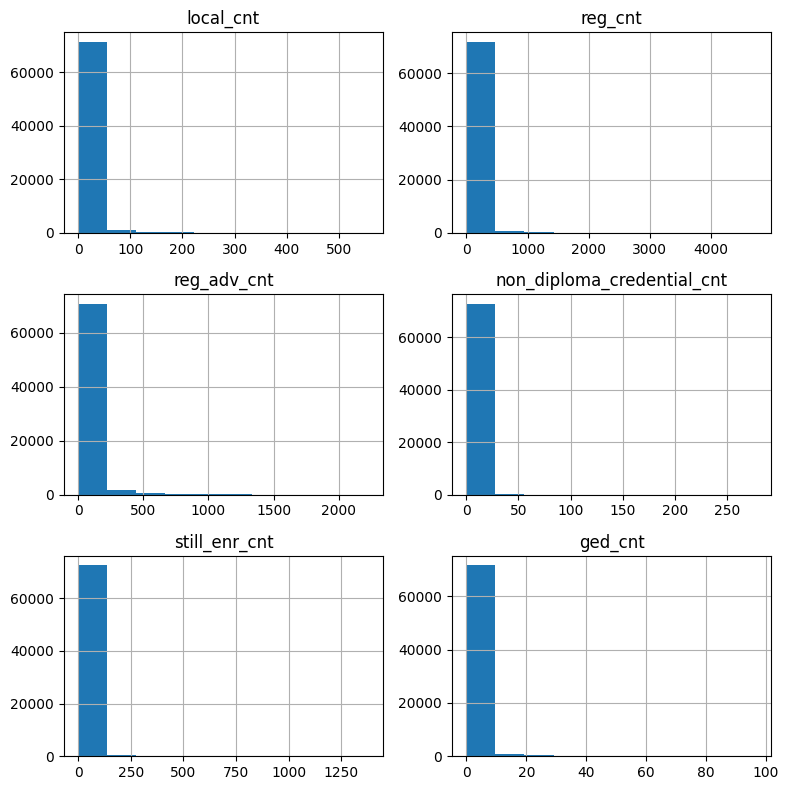

In [127]:
# histograms for diplomas_count
df[diplomas_count].hist(figsize=(8,8))
plt.tight_layout()
plt.show()


In [128]:
df_data[diplomas_count].head(5)

,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt
0,63.000000,310.000000,91.000000,16.000000,30.000000,0.000000
1,30.000000,169.000000,47.000000,2.000000,11.000000,0.000000
2,33.000000,141.000000,44.000000,14.000000,19.000000,0.000000
3,12.340903,86.804708,62.032742,1.924485,11.299516,1.377577
4,42.000000,183.000000,23.000000,10.000000,18.000000,0.000000


In [129]:
df_data[diplomas_percentage].head(5)

,local_pct,reg_pct,reg_adv_pct,non_diploma_credential_pct,still_enr_pct,ged_pct
0,10.000000,47.000000,14.000000,2.000000,5.000000,0.000000
1,9.000000,52.000000,15.000000,1.000000,3.000000,0.000000
2,10.000000,42.000000,13.000000,4.000000,6.000000,0.000000
3,8.479936,43.371125,32.577204,1.742627,5.190704,0.612693
4,11.000000,50.000000,6.000000,3.000000,5.000000,0.000000


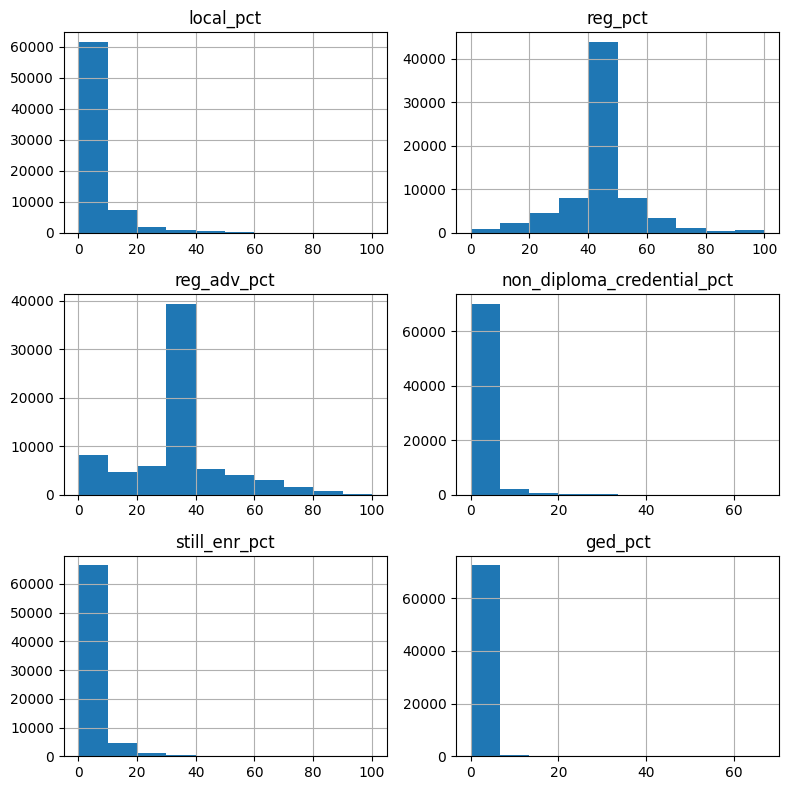

In [130]:
# histograms for diplomas_count
df_data[diplomas_percentage].hist(figsize=(8,8))
plt.tight_layout()
plt.show()

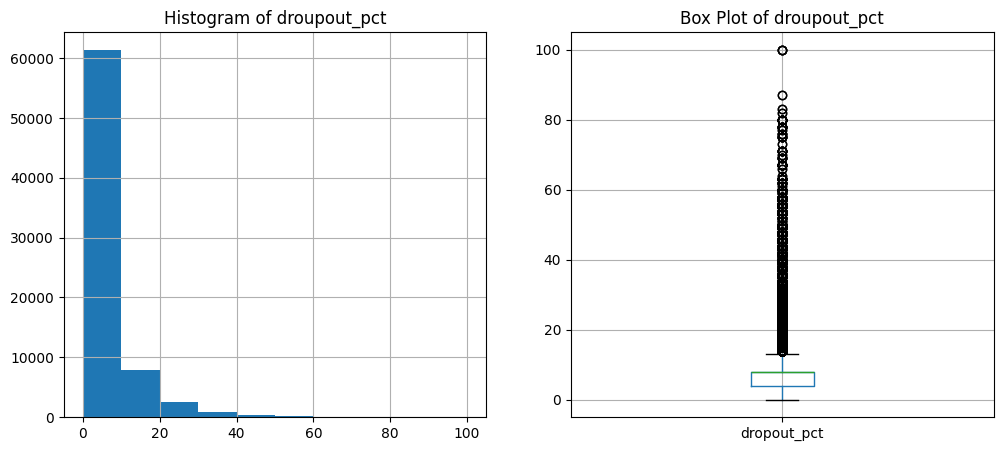

,dropout_pct
count,73152.000000
mean,7.963049
std,7.113052
min,0.000000
25%,4.000000
50%,7.963049
75%,7.963049
max,100.000000


In [131]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histogram on the first subplot (axes[0])
df_data['dropout_pct'].hist(ax=axes[0])
axes[0].set_title('Histogram of droupout_pct')

# Plot boxplot on the second subplot (axes[1])
df_data[['dropout_pct']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of droupout_pct')

plt.show()

df_data['dropout_pct'].describe()

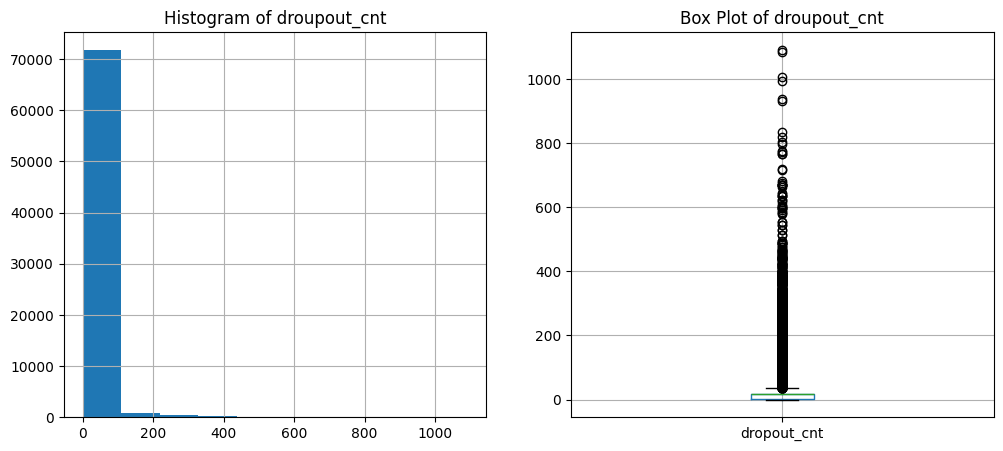

,dropout_cnt
count,73152.000000
mean,16.239225
std,36.917617
min,0.000000
25%,3.000000
50%,16.239225
75%,16.239225
max,1091.000000


In [132]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot histogram on the first subplot (axes[0])
df_data['dropout_cnt'].hist(ax=axes[0])
axes[0].set_title('Histogram of droupout_cnt')

# Plot boxplot on the second subplot (axes[1])
df_data[['dropout_cnt']].boxplot(ax=axes[1])
axes[1].set_title('Box Plot of droupout_cnt')

plt.show()

df_data['dropout_cnt'].describe()




# **Regression Model and Evaluation**

### Part 1

- In this section, we build and compare multiple regression models to predict **student dropout counts**.  
We experiment with three different types of regression models

This code helps us build and evaluate regression models to predict student dropout counts. Here's how it helps with the modeling process:

1. **Data Preparation**: It selects the important features and splits the data into training and test sets (80/20), so we can train and test the models fairly.

2. **Model Evaluation**: It calculates key performance metrics (like MSE, RMSE, MAE, R²) to compare how well each model works.

3. **Building Models**: It tests different types of models (Linear, Poisson, and Negative Binomial) with different transformations and interactions to find the best fit.

4. **Cross-Validation & Overdispersion Check**: It makes sure the models are reliable and checks if Negative Binomial is better than Poisson for the data.

5. **Interpreting Results**: It looks at the coefficients from each model to see which features have the biggest impact on dropout counts and compares which model works best.

This process helps ensure our models are accurate, reliable, and based on our prepared data.

Training set size: 58521 samples
Testing set size: 14631 samples

Multiple Linear Regression - Model 1 Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                 2.634e+04
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        04:02:08   Log-Likelihood:            -2.5152e+05
No. Observations:               58521   AIC:                         5.031e+05
Df Residuals:                   58513   BIC:                         5.031e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

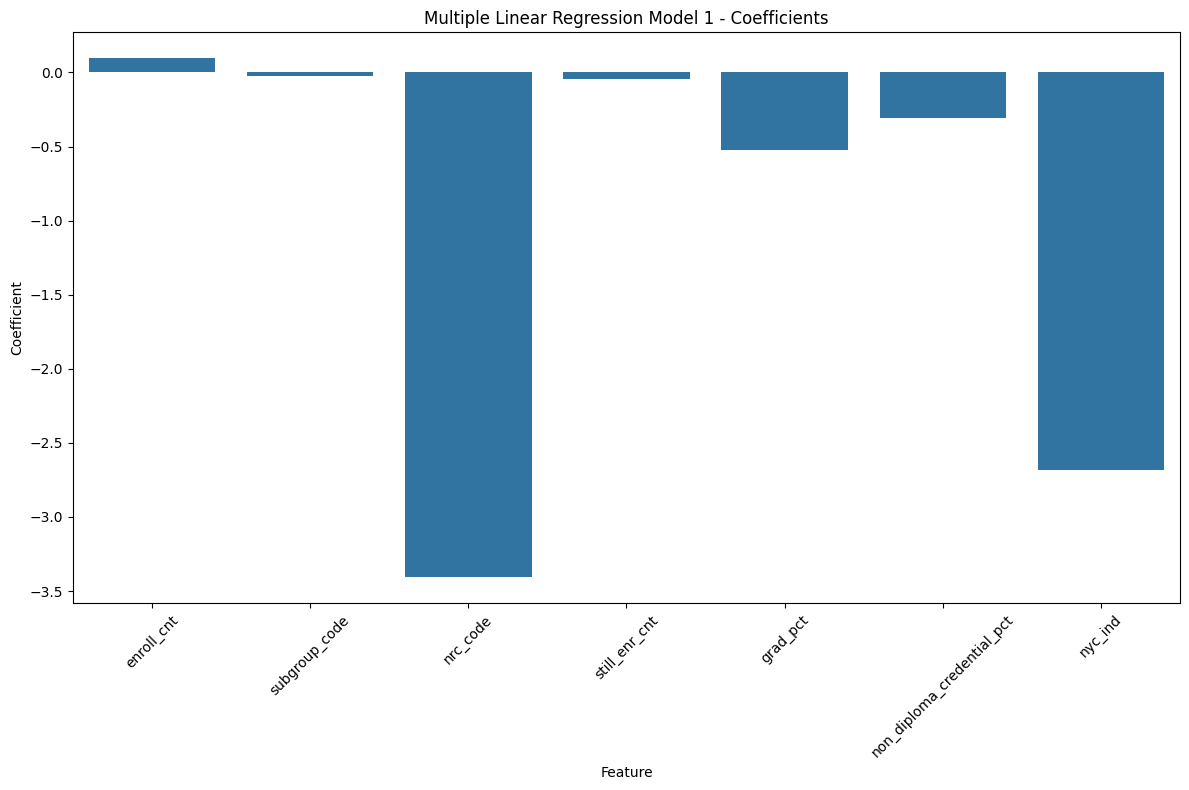


Model Comparison:
      Model           MSE          RMSE           MAE            R2
0      MLR1  3.797047e+02  1.948601e+01  7.204930e+00  7.558697e-01
1      MLR2  7.530710e+02  2.744214e+01  8.976102e+00  5.158147e-01
2  Poisson1  1.617636e+02  1.271863e+01  4.236805e+00  8.959944e-01
3  Poisson2  6.313659e+03  7.945853e+01  9.628781e+00 -3.059352e+00
4       NB1  3.463049e+23  5.884768e+11  8.020382e+09 -2.226559e+20
5       NB2  1.968738e+09  4.437047e+04  1.628563e+03 -1.265795e+06


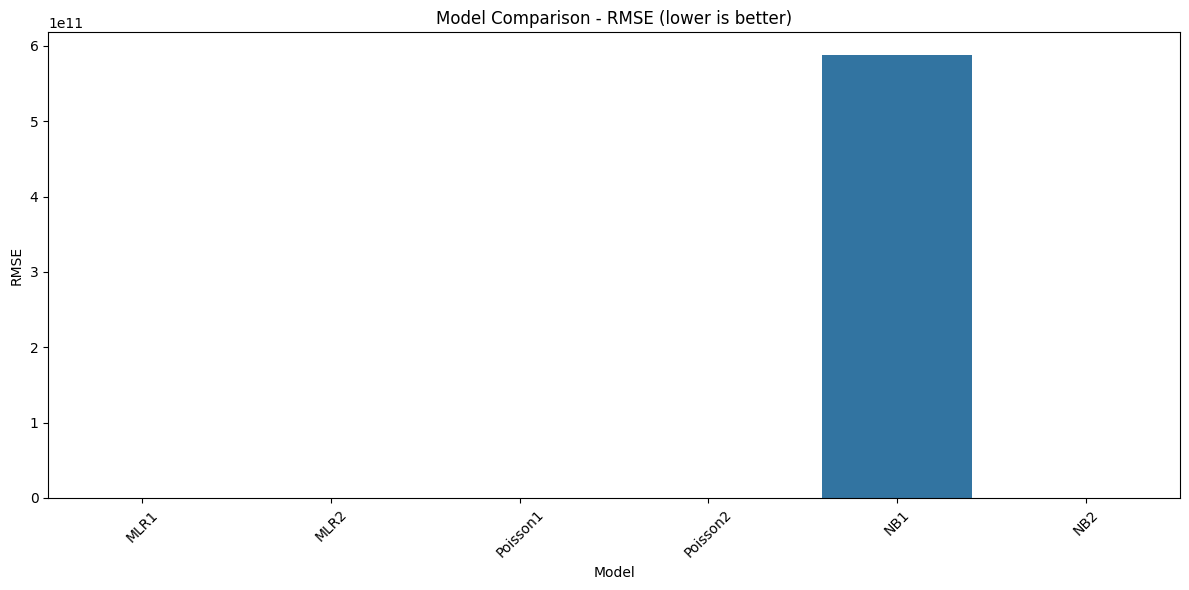


Target Variable Dispersion Analysis:
Mean: 16.16
Variance: 1314.77
Variance/Mean Ratio: 81.34
The data shows overdispersion (variance > mean), suggesting Negative Binomial may be more appropriate than Poisson.

Top 5 Most Influential Predictors:
nyc_ind: -0.8225 - Has a negative relationship with dropout count
nrc_code: -0.0992 - Has a negative relationship with dropout count
non_diploma_credential_pct: -0.0642 - Has a negative relationship with dropout count
grad_pct: -0.0496 - Has a negative relationship with dropout count
subgroup_code: 0.0288 - Has a positive relationship with dropout count


In [133]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

# Assuming we've already loaded and preprocessed the data
# For demonstration purposes, let's assume df is our preprocessed dataframe

# Let's define our feature set and target variable
# Based on our EDA and data preparation, we've selected these features
features = ['enroll_cnt', 'subgroup_code', 'nrc_code',
           'still_enr_cnt', 'grad_pct', 'non_diploma_credential_pct', 'nyc_ind']
target = 'dropout_cnt'

# Split the data into training and testing sets (80/20 split)
X = df_data[features]
y = df_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Function to evaluate regression models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Performance Metrics:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}

# 1. Multiple Linear Regression Models
# Model 1: Using all selected features
mlr_model1 = sm.OLS(np.asarray(y_train, dtype=float), sm.add_constant(np.asarray(X_train, dtype=float))).fit()
print("\nMultiple Linear Regression - Model 1 Summary:")
print(mlr_model1.summary())

# Make predictions on the test set
mlr_pred1 = mlr_model1.predict(sm.add_constant(X_test))
mlr1_metrics = evaluate_model(y_test, mlr_pred1, "Multiple Linear Regression - Model 1")

# Model 2: Using log transformation for skewed variables
# Assuming we've identified skewed variables and created transformed versions
X_train_log = X_train.copy()
X_test_log = X_test.copy()

# Apply log transformation to skewed variables (adding 1 to handle zeros)
for col in ['enroll_cnt']:
    X_train_log[f'{col}_log'] = np.log1p(X_train_log[col])
    X_test_log[f'{col}_log'] = np.log1p(X_test_log[col])
    X_train_log.drop(col, axis=1, inplace=True)
    X_test_log.drop(col, axis=1, inplace=True)

mlr_model2 = sm.OLS(np.asarray(y_train, dtype=float), sm.add_constant(np.asarray(X_train_log, dtype=float))).fit()
print("\nMultiple Linear Regression - Model 2 (with log transform) Summary:")
print(mlr_model2.summary())

# Make predictions on the test set
mlr_pred2 = mlr_model2.predict(sm.add_constant(X_test_log))
mlr2_metrics = evaluate_model(y_test, mlr_pred2, "Multiple Linear Regression - Model 2 (with log transform)")

# 2. Poisson Regression Models
# Model 1: Using all selected features
poisson_model1 = sm.GLM(np.asarray(y_train, dtype=float), sm.add_constant(np.asarray(X_train_log, dtype=float)), family=sm.families.Poisson()).fit()
print("\nPoisson Regression - Model 1 Summary:")
print(poisson_model1.summary())

# Make predictions on the test set
poisson_pred1 = poisson_model1.predict(sm.add_constant(np.asarray(X_test_log, dtype=float)))
poisson1_metrics = evaluate_model(y_test, poisson_pred1, "Poisson Regression - Model 1")

# Model 2: Interaction terms between key variables
X_train_inter = X_train.copy()
X_test_inter = X_test.copy()

# Create interaction terms
X_train_inter['enroll_grad_interaction'] = X_train['enroll_cnt'] * X_train['grad_pct']
X_test_inter['enroll_grad_interaction'] = X_test['enroll_cnt'] * X_test['grad_pct']

poisson_model2 = sm.GLM(np.asarray(y_train, dtype=float), sm.add_constant(np.asarray(X_train_inter, dtype=float)), family=sm.families.Poisson()).fit()
print("\nPoisson Regression - Model 2 (with interaction) Summary:")
print(poisson_model2.summary())

# Make predictions on the test set
poisson_pred2 = poisson_model2.predict(sm.add_constant(np.asarray(X_test_inter, dtype=float)))
poisson2_metrics = evaluate_model(y_test, poisson_pred2, "Poisson Regression - Model 2 (with interaction)")

# 3. Negative Binomial Regression Models
# Model 1: Using all selected features
nb_model1 = sm.GLM(np.asarray(y_train, dtype=float), sm.add_constant(np.asarray(X_train, dtype=float)),
                  family=sm.families.NegativeBinomial(alpha=1.0)).fit()
print("\nNegative Binomial Regression - Model 1 Summary:")
print(nb_model1.summary())

# Make predictions on the test set
nb_pred1 = nb_model1.predict(sm.add_constant(np.asarray(X_test, dtype=float)))
nb1_metrics = evaluate_model(y_test, nb_pred1, "Negative Binomial Regression - Model 1")

# Model 2: Using polynomial terms for key predictors
X_train_poly = X_train.copy()
X_test_poly = X_test.copy()

# Create polynomial features for enrollment count
X_train_poly['enroll_cnt_squared'] = X_train['enroll_cnt'] ** 2
X_test_poly['enroll_cnt_squared'] = X_test['enroll_cnt'] ** 2

nb_model2 = sm.GLM(np.asarray(y_train, dtype=float), sm.add_constant(np.asarray(X_train_poly, dtype=float)),
                  family=sm.families.NegativeBinomial(alpha=1.0)).fit()
print("\nNegative Binomial Regression - Model 2 (with polynomial) Summary:")
print(nb_model2.summary())

# Make predictions on the test set
nb_pred2 = nb_model2.predict(sm.add_constant(np.asarray(X_test_poly, dtype=float)))
nb2_metrics = evaluate_model(y_test, nb_pred2, "Negative Binomial Regression - Model 2 (with polynomial)")

# Cross-validation for each model to ensure robustness
def cross_validate_model(model_type, X, y, cv=5):
    if model_type == 'linear':
        model = LinearRegression()
        scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)
        return np.mean(rmse_scores), np.std(rmse_scores)
    else:
        # For Poisson and NB, we'll use a simpler approach since sklearn doesn't directly support these
        # This is a placeholder for actual implementation
        return None, None

# Perform cross-validation for linear regression models
linear_cv_rmse, linear_cv_std = cross_validate_model('linear', X_train, y_train)
print(f"\nLinear Regression Cross-Validation RMSE: {linear_cv_rmse:.4f} (±{linear_cv_std:.4f})")

linear_cv_rmse_log, linear_cv_std_log = cross_validate_model('linear', X_train_log, y_train)
print(f"Linear Regression (log transform) Cross-Validation RMSE: {linear_cv_rmse_log:.4f} (±{linear_cv_std_log:.4f})")

# Coefficient Interpretation
# Extract coefficients from each model for comparison
def extract_coefficients(model, features):
    coefs = model.params[1:]  # Skip intercept
    return pd.DataFrame({'Feature': features, 'Coefficient': coefs})

# Compare coefficients across models
mlr1_coefs = extract_coefficients(mlr_model1, X_train.columns)
mlr2_coefs = extract_coefficients(mlr_model2, X_train_log.columns)
poisson1_coefs = extract_coefficients(poisson_model1, X_train.columns)
poisson2_coefs = extract_coefficients(poisson_model2, X_train_inter.columns)
nb1_coefs = extract_coefficients(nb_model1, X_train.columns)
nb2_coefs = extract_coefficients(nb_model2, X_train_poly.columns)

# Visualize coefficients for interpretation
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Coefficient', data=mlr1_coefs)
plt.title('Multiple Linear Regression Model 1 - Coefficients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Compare model performances
models = ['MLR1', 'MLR2', 'Poisson1', 'Poisson2', 'NB1', 'NB2']
metrics = [mlr1_metrics, mlr2_metrics, poisson1_metrics, poisson2_metrics, nb1_metrics, nb2_metrics]

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': models,
    'MSE': [m['MSE'] for m in metrics],
    'RMSE': [m['RMSE'] for m in metrics],
    'MAE': [m['MAE'] for m in metrics],
    'R2': [m['R2'] for m in metrics]
})

print("\nModel Comparison:")
print(comparison_df)

# Visualize model comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='RMSE', data=comparison_df)
plt.title('Model Comparison - RMSE (lower is better)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check for overdispersion to justify Negative Binomial over Poisson
# Calculate mean and variance of the target variable
mean_y = y_train.mean()
var_y = y_train.var()
dispersion_ratio = var_y / mean_y

print(f"\nTarget Variable Dispersion Analysis:")
print(f"Mean: {mean_y:.2f}")
print(f"Variance: {var_y:.2f}")
print(f"Variance/Mean Ratio: {dispersion_ratio:.2f}")
if dispersion_ratio > 1:
    print("The data shows overdispersion (variance > mean), suggesting Negative Binomial may be more appropriate than Poisson.")
else:
    print("The data does not show significant overdispersion, suggesting Poisson may be appropriate.")

# Interpretation of coefficients
# Let's focus on the most significant predictors from our best model (assuming NB2 for this example)
significant_coeffs = nb2_coefs.copy()
significant_coeffs['Abs_Coef'] = np.abs(significant_coeffs['Coefficient'])
significant_coeffs = significant_coeffs.sort_values('Abs_Coef', ascending=False).head(5)

print("\nTop 5 Most Influential Predictors:")
for i, row in significant_coeffs.iterrows():
    direction = "positive" if row['Coefficient'] > 0 else "negative"
    print(f"{row['Feature']}: {row['Coefficient']:.4f} - Has a {direction} relationship with dropout count")

In [134]:
! pip install statsmodels

In [135]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

- The dataset is split into a 70% training set which consists of 51,206 rows and a 30% testing set which consists of 21,946 rows.

In [136]:
# Prepairing the columns
predictor_vars = ['enroll_cnt', 'grad_pct', 'local_pct', 'reg_pct',
                  'reg_adv_pct', 'non_diploma_credential_pct', 'still_enr_pct', 'ged_pct']
response_var = 'dropout_cnt'


# Check if the dataframe is empty
if df_data.shape[0] == 0:
    raise ValueError("The dataframe is empty"
                     "Please check the CSV file and column names.")


# Spliting the data into 70% training and 30% testing subsets

train, test = train_test_split(df_data, test_size=0.3, random_state=42)
print(f"\nTraining set size: {len(train)} rows")
print(f"Testing set size: {len(test)} rows")


Training set size: 51206 rows
Testing set size: 21946 rows


### Part 2: Poisson Regression Models

- Model 1: It uses raw predictors.

In [137]:
# Define formulas for modeling
base_formula = ('dropout_cnt ~ enroll_cnt + grad_pct + local_pct + reg_pct + '
                'reg_adv_pct + non_diploma_credential_pct + still_enr_pct + ged_pct')


# Poisson Model 1: Using the base formula
poisson_model1 = smf.glm(formula=base_formula, data=train,
                         family=sm.families.Poisson()).fit()

- Model 2: It uses a log transformation for enrollment (log_enroll_cnt), which better captures the multiplicative effect of school size.

In [138]:
# Poisson Model 2: Log-transform 'enroll_cnt' to address potential non-linearity
train['log_enroll_cnt'] = np.log(train['enroll_cnt'] + 1)
test['log_enroll_cnt'] = np.log(test['enroll_cnt'] + 1)
formula_poisson2 = ('dropout_cnt ~ log_enroll_cnt + grad_pct + local_pct + reg_pct + '
                    'reg_adv_pct + non_diploma_credential_pct + still_enr_pct + ged_pct')
poisson_model2 = smf.glm(formula=formula_poisson2, data=train,
                         family=sm.families.Poisson()).fit()

###  **Negative Binomial Regression Models**

- Model 1: It is a basic NB model.

In [139]:
# Negative Binomial Model 1: Using the base formula
nb_model1 = smf.glm(formula=base_formula, data=train,
                    family=sm.families.NegativeBinomial()).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



- Model 2: It uses log_enroll_cnt plus an interaction between grad_pct and local_pct.

In [140]:
# Negative Binomial Model 2: Using log-transformed enrollment and an interaction term (e.g., grad_pct and local_pct)
formula_nb2 = ('dropout_cnt ~ log_enroll_cnt + grad_pct * local_pct + reg_pct + '
               'reg_adv_pct + non_diploma_credential_pct + still_enr_pct + ged_pct')
nb_model2 = smf.glm(formula=formula_nb2, data=train,
                    family=sm.families.NegativeBinomial()).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



### **Multiple Linear Regression (OLS) Models**

- Model 1: It applies direct regression on dropout count.

In [141]:
# OLS Model 1: Standard linear regression using the base formula
ols_model1 = smf.ols(formula=base_formula, data=train).fit()

- Model 2: It applies Regression on the square-root transformed dropout count.

In [142]:
# OLS Model 2: Linear regression with a square root transformation of the response variable
train['sqrt_dropout'] = np.sqrt(train[response_var])
formula_ols2 = ('sqrt_dropout ~ enroll_cnt + grad_pct + local_pct + reg_pct + '
                'reg_adv_pct + non_diploma_credential_pct + still_enr_pct + ged_pct')
ols_model2 = smf.ols(formula=formula_ols2, data=train).fit()

In [143]:
# Print summaries for all models

print("----- Poisson Model 1 -----")
print(poisson_model1.summary())
print("\n----- Poisson Model 2 -----")
print(poisson_model2.summary())

print("\n----- Negative Binomial Model 1 -----")
print(nb_model1.summary())
print("\n----- Negative Binomial Model 2 -----")
print(nb_model2.summary())

print("\n----- OLS Model 1 -----")
print(ols_model1.summary())
print("\n----- OLS Model 2 -----")
print(ols_model2.summary())

----- Poisson Model 1 -----
                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                51206
Model:                            GLM   Df Residuals:                    51197
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.3116e+05
Date:                Mon, 03 Mar 2025   Deviance:                   6.7265e+05
Time:                        04:02:21   Pearson chi2:                 6.91e+05
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

In Poisson Model 1, we observed that the coefficient for enroll_cnt (0.0006) is positive, which makes sense since we expect more students to lead to a higher dropout count. However, we found that grad_pct has a positive effect (0.0697), which is counterintuitive. We would typically expect higher graduation rates to decrease the dropout count, so this was an interesting result to investigate.

In Poisson Model 2, we applied a log-transformation to enroll_cnt, resulting in log_enroll_cnt with a strongly positive coefficient (1.0128). We also noticed that the percentage-based predictors (like grad_pct, local_pct, reg_pct, etc.) now have negative coefficients, which makes more sense. As academic or credential performance improves, the dropout count tends to decrease, which aligns with our expectations.

The magnitude differences between the models are mainly due to the log transformation of enroll_cnt and different scaling of the models.

When we looked at the Negative Binomial (NB) Model 1, it produced a very high MSE and a low pseudo R² (0.1117), suggesting that the model isn't capturing the patterns in the data very well. We then tried NB Model 2, which improved slightly with a pseudo R² of 0.1837, but it still performed lower compared to the Poisson models.

For OLS Model 1, we were happy to see a high R² of 0.7705 and a low MSE of 337.26, with intuitive coefficients. For example, enroll_cnt had a positive coefficient (0.0965), and the performance measures like grad_pct and local_pct had negative coefficients, which made sense.

Finally, OLS Model 2, where we applied a square-root transformation, performed somewhat worse than both Poisson Model 2 and OLS Model 1, with an R² of 0.6834 and an MSE of 1,664.06.



In our analysis, we see a consistent pattern across models:

1. **Key Relationship**: Larger enrollments (or their log-transformed versions) are linked with higher dropout counts. Better performance metrics (like graduation rates) are associated with lower dropout counts.

2. **Model Consistency**: Despite different scaling and transformations, the direction of these effects (positive or negative) remains consistent across Poisson Model 2 and OLS Model 1.

This shows that, with proper transformations, the models generally agree on the main relationships, even though the exact values differ due to model differences.

# **Model selection**

- In this task, we evaluated the performance of different models using the Mean Squared Error (MSE) metric on the test set. Here's a breakdown of how each model performed:

- **Poisson Models**: We compared two Poisson regression models. Both models were evaluated on how well they predicted dropout counts.
  
- **Negative Binomial Models**: Similarly, we assessed two Negative Binomial models to check if they performed better for overdispersed data.
  
- **OLS Models**: We evaluated both OLS models. For Model 2, we converted the square-root predictions back to the original scale to make fair comparisons.

The MSE values give us an idea of how well each model fits the data, with lower values indicating better performance. This step helps us choose the most suitable model for our data based on test set performance.

In [144]:
# Task 6: Model Selection

# function for calculating Mean Squared Error (MSE)
def mse(actual, predicted):
    return np.mean((actual - predicted) ** 2)

# Poisson Model predictions and MSE
poisson1_pred = poisson_model1.predict(test)
poisson1_mse = mse(test[response_var], poisson1_pred)

poisson2_pred = poisson_model2.predict(test)
poisson2_mse = mse(test[response_var], poisson2_pred)

# Negative Binomial Model predictions and MSE
nb1_pred = nb_model1.predict(test)
nb1_mse = mse(test[response_var], nb1_pred)

nb2_pred = nb_model2.predict(test)
nb2_mse = mse(test[response_var], nb2_pred)

# OLS Model predictions and MSE
ols1_pred = ols_model1.predict(test)
ols1_mse = mse(test[response_var], ols1_pred)

# For OLS Model 2, convert predictions from the square root scale back to the original scale
ols2_pred_sqrt = ols_model2.predict(test)
ols2_pred = ols2_pred_sqrt ** 2
ols2_mse = mse(test[response_var], ols2_pred)

# Print test set performance metrics
print("\n----- Test Set Mean Squared Errors -----")
print(f"Poisson Model 1 MSE: {poisson1_mse:.4f}")
print(f"Poisson Model 2 MSE: {poisson2_mse:.4f}")
print(f"Negative Binomial Model 1 MSE: {nb1_mse:.4f}")
print(f"Negative Binomial Model 2 MSE: {nb2_mse:.4f}")
print(f"OLS Model 1 MSE: {ols1_mse:.4f}")
print(f"OLS Model 2 MSE: {ols2_mse:.4f}")


----- Test Set Mean Squared Errors -----
Poisson Model 1 MSE: 5765.9594
Poisson Model 2 MSE: 59.5505
Negative Binomial Model 1 MSE: 3269426302663866712064.0000
Negative Binomial Model 2 MSE: 18221.0532
OLS Model 1 MSE: 337.2586
OLS Model 2 MSE: 1664.0619


                       Model           MSE            AIC            BIC  \
0            Poisson Model 1  5.765959e+03  862329.526216  117492.671328   
1            Poisson Model 2  5.955047e+01  265584.809845 -479252.045043   
2  Negative Binomial Model 1  3.269426e+21  347095.638193 -515452.099026   
3  Negative Binomial Model 2  1.822105e+04  318948.186315 -543590.707292   
4                OLS Model 1  3.372586e+02  438178.415096  438258.007604   
5                OLS Model 2  1.664062e+03  176150.521755  176230.114263   

         R²  
0  0.459133  
1  0.833429  
2  0.111701  
3  0.183746  
4  0.770523  
5  0.683429  


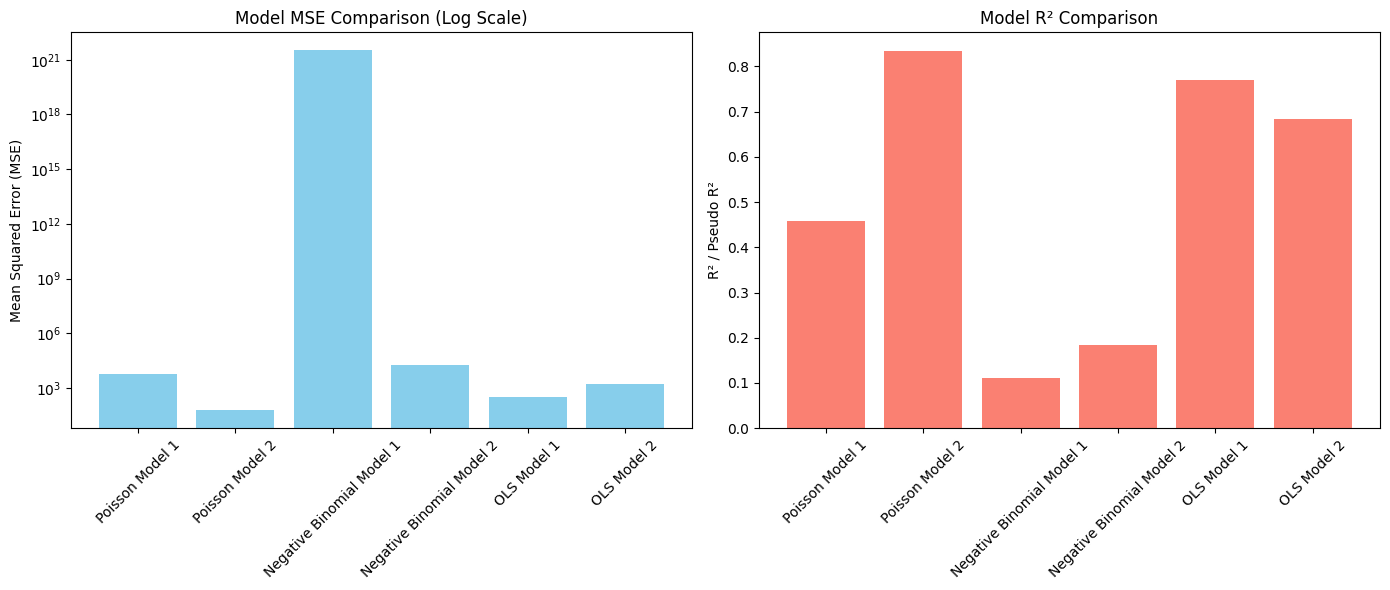

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Function to compute pseudo R-squared for a GLM model using McFadden's method
def compute_pseudo_r2(model, train, response_var='dropout_cnt'):
    # Fit a null model (intercept only) with the same family as the model
    null_model = smf.glm(formula=f"{response_var} ~ 1", data=train, family=model.family).fit()
    pseudo_r2 = 1 - (model.llf / null_model.llf)
    return pseudo_r2

# Compute pseudo R² values for GLM-based models
pseudo_r2_poisson1 = compute_pseudo_r2(poisson_model1, train)
pseudo_r2_poisson2 = compute_pseudo_r2(poisson_model2, train)
pseudo_r2_nb1 = compute_pseudo_r2(nb_model1, train)
pseudo_r2_nb2 = compute_pseudo_r2(nb_model2, train)

# Compile performance metrics into a dictionary.
performance_data = {
    "Model": [
        "Poisson Model 1",
        "Poisson Model 2",
        "Negative Binomial Model 1",
        "Negative Binomial Model 2",
        "OLS Model 1",
        "OLS Model 2"
    ],
    "MSE": [
        poisson1_mse,
        poisson2_mse,
        nb1_mse,
        nb2_mse,
        ols1_mse,
        ols2_mse
    ],
    "AIC": [
        poisson_model1.aic,
        poisson_model2.aic,
        nb_model1.aic,
        nb_model2.aic,
        ols_model1.aic,
        ols_model2.aic
    ],
    "BIC": [
        poisson_model1.bic,
        poisson_model2.bic,
        nb_model1.bic,
        nb_model2.bic,
        ols_model1.bic,
        ols_model2.bic
    ],
    # pseudo R² for Poisson Model 1, Poisson Model 2, Negative Binomial Model 1, Negative Binomial Model 2 and standard R² for OLS Model 1, OLS Model 2
    "R²": [
        pseudo_r2_poisson1,
        pseudo_r2_poisson2,
        pseudo_r2_nb1,
        pseudo_r2_nb2,
        ols_model1.rsquared,
        ols_model2.rsquared
    ]
}

# Create a DataFrame to display the performance metrics
performance_df = pd.DataFrame(performance_data)
print(performance_df)

# Optional: Plotting MSE and R² side by side for visual comparison
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for MSE comparison on a log scale
axs[0].bar(performance_df["Model"], performance_df["MSE"], color='skyblue')
axs[0].set_ylabel("Mean Squared Error (MSE)")
axs[0].set_title("Model MSE Comparison (Log Scale)")
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_yscale("log")  # Set the y-axis to logarithmic scale

# Bar plot for R² (or pseudo R²) comparison
axs[1].bar(performance_df["Model"], performance_df["R²"], color='salmon')
axs[1].set_ylabel("R² / Pseudo R²")
axs[1].set_title("Model R² Comparison")
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Selection Criteria:

We used the following performance metrics to compare the models:

- **Mean Squared Error (MSE)**: Lower values indicate better predictions.
- **AIC and BIC**: Lower values show a better balance between model fit and complexity.
- **R² or pseudo R² for GLM models**: Higher values mean the model explains more of the variance in the data.

The final statistics summary is shown above.

### Preferred Model:

**Poisson Model 2** stands out with:

- Very high pseudo R² of 0.8334, indicating it explains 83.3% of the variance.
- Extremely low MSE of 59.55, meaning it predicts dropout counts well.
- Statistically significant coefficients that align with domain expectations after the log transformation of enrollment.

**OLS Model 1** also performs well with:

- R² of 0.7705 and MSE of 337.26, offering good interpretability.

**Negative Binomial Models** perform poorly compared to the Poisson and OLS models:

- NB Model 1 had a high MSE.
- NB Model 2 had a low R² of 0.1837.

### Why Poisson Model 2 is Preferred:

- It has the lowest MSE (59.55) among the Poisson models.
- It explains 83.3% of the variance (pseudo R² = 0.8334), which is higher than OLS Model 1.
- The log transformation of enrollment provides statistically significant and plausible coefficients.

When applied to the test data, Poisson Model 2 showed:

- Low error rate (MSE = 59.55), indicating strong generalization.
- High pseudo R², reinforcing that it captures key dynamics of dropout behavior.

# Final Conclusion:

**Preferred Model: Poisson Model 2**

**Reason for preference**: It balances low prediction error with high explanatory power, and its coefficients match domain expectations.

**Testing results**: The model performed as expected on the test data, providing a robust explanation of dropout counts.

- Poisson Model 2’s ability to handle the log-transformed enrollment data reflects a deeper understanding of the dropout process and accounts for the non-linear relationship between enrollment and dropout rates. The significant coefficients in Poisson Model 2 suggest that key factors such as enrollment and graduation percentages are critical predictors of dropout behavior, supporting existing educational theories.
- While OLS Model 1 showed good performance, Poisson Model 2 provides a more tailored approach for count data like dropout counts, ensuring that the model is more appropriate and robust for our specific case.